# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Investigation of TMDb Movie data<br>
dependent variable(or target-variable): popularity, revenue, quantity of released movies<br>
independent (or predictor) variables:genre, budget, popularity

Questions to be answered:<br>

1) What kinds of properties are associated with movies that have high revenues?<br>
2) 3) 4) Which are the most sucessful actors, directors, production companies?<br>
5) Which genres are most popular from year to year?<br>

In [287]:
import pandas as pd
import numpy as np
import unicodecsv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Cleaning with Python
At first I tried cleaning the data with python. Looking back it would have probably made more sense to directly start working with pandas. But well, in hindsight one is always wiser.<br>
Anyway, I chose to start by newly reading in the csv.-file in to a python list of dictionaries

In [288]:
tmdbmovies = []
f = open('tmdb-movies.csv', 'rb')
reader = unicodecsv.DictReader(f)
for row in reader:
    tmdbmovies.append(row)
f.close()

print(len(tmdbmovies))

tmdbmovies[:1]

10866


[{'id': '135397',
  'imdb_id': 'tt0369610',
  'popularity': '32.985763',
  'budget': '150000000',
  'revenue': '1513528810',
  'original_title': 'Jurassic World',
  'cast': "Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson",
  'homepage': 'http://www.jurassicworld.com/',
  'director': 'Colin Trevorrow',
  'tagline': 'The park is open.',
  'keywords': 'monster|dna|tyrannosaurus rex|velociraptor|island',
  'overview': 'Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.',
  'runtime': '124',
  'genres': 'Action|Adventure|Science Fiction|Thriller',
  'production_companies': 'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
  'release_date': '6/9/15',
  'vote_count': '5562',
  'vote_average': '6.5',
  'release_year': '2015',
  'budget_adj': '137999939.280026',
  'revenue_adj': '1392445892.5238'}]

I created a 'list' of 'dictionaries'. Took my while to understand what that means. 

In [289]:
type(tmdbmovies)

list

In [290]:
type(tmdbmovies[0])

dict

Since the types of the dictionary entries are all 'string' I decided to firstly parse everything properly

In [291]:
type(tmdbmovies[0]['budget'])

str

In [292]:
type(tmdbmovies[0]['budget_adj'])

str

In [293]:

def parse_budget_and_revenue(i):
    if i == 0:
        return None
    else:
        return i

In [294]:
#parsing string to int
for tmdbmovie in tmdbmovies:
    tmdbmovie['budget'] = int(float(tmdbmovie['budget']))
    tmdbmovie['revenue'] = int(float(tmdbmovie['revenue']))
    tmdbmovie['budget_adj'] = int(float(tmdbmovie['budget_adj']))
    tmdbmovie['revenue_adj'] = int(float(tmdbmovie['revenue_adj']))

In [295]:
#replace '0' values as 'None'
for tmdbmovie in tmdbmovies:
    tmdbmovie['budget'] = parse_budget_and_revenue(tmdbmovie['budget'])
    tmdbmovie['revenue'] = parse_budget_and_revenue(tmdbmovie['revenue'])
    tmdbmovie['budget_adj'] = parse_budget_and_revenue(tmdbmovie['budget_adj'])
    tmdbmovie['revenue_adj'] = parse_budget_and_revenue(tmdbmovie['revenue_adj'])

In [296]:
for i in tmdbmovies:
    print(i['budget'])
    print(type(i['budget']))

150000000
<class 'int'>
150000000
<class 'int'>
110000000
<class 'int'>
200000000
<class 'int'>
190000000
<class 'int'>
135000000
<class 'int'>
155000000
<class 'int'>
108000000
<class 'int'>
74000000
<class 'int'>
175000000
<class 'int'>
245000000
<class 'int'>
176000003
<class 'int'>
15000000
<class 'int'>
88000000
<class 'int'>
280000000
<class 'int'>
44000000
<class 'int'>
48000000
<class 'int'>
130000000
<class 'int'>
95000000
<class 'int'>
160000000
<class 'int'>
190000000
<class 'int'>
30000000
<class 'int'>
110000000
<class 'int'>
40000000
<class 'int'>
28000000
<class 'int'>
150000000
<class 'int'>
68000000
<class 'int'>
81000000
<class 'int'>
20000000
<class 'int'>
61000000
<class 'int'>
None
<class 'NoneType'>
49000000
<class 'int'>
29000000
<class 'int'>
40000000
<class 'int'>
58000000
<class 'int'>
6000000
<class 'int'>
None
<class 'NoneType'>
175000000
<class 'int'>
50000000
<class 'int'>
11000000
<class 'int'>
28000000
<class 'int'>
90000000
<class 'int'>
30000000
<class

13300000
<class 'int'>
6000000
<class 'int'>
None
<class 'NoneType'>
22000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
6000000
<class 'int'>
3500000
<class 'int'>
8500000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
15000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
30000000
<class 'int'>
2000000
<class 'int'>
None
<class 'NoneType'>
1000000
<class 'int'>
5500000
<class 'int'>
None
<class 'NoneType'>
15000000
<class 'int'>
200000
<class 'int'>
21000000
<class 'int'>
15000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
6500000
<class 'int'>
30000000
<class 'int'>
6600000
<class 'int'>
5000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
5000000
<class 'int'>
1000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
2000000
<class 'int'>
None


<class 'int'>
29000000
<class 'int'>
23600000
<class 'int'>
50000000
<class 'int'>
40000000
<class 'int'>
175000000
<class 'int'>
40000000
<class 'int'>
None
<class 'NoneType'>
38000000
<class 'int'>
100000000
<class 'int'>
40000000
<class 'int'>
60000000
<class 'int'>
150000000
<class 'int'>
20000000
<class 'int'>
200000000
<class 'int'>
None
<class 'NoneType'>
65000000
<class 'int'>
26000000
<class 'int'>
16000000
<class 'int'>
53000000
<class 'int'>
30000000
<class 'int'>
20000000
<class 'int'>
33000000
<class 'int'>
None
<class 'NoneType'>
30000000
<class 'int'>
26000000
<class 'int'>
50000000
<class 'int'>
5000000
<class 'int'>
150000000
<class 'int'>
None
<class 'NoneType'>
100000000
<class 'int'>
18500000
<class 'int'>
40000000
<class 'int'>
None
<class 'NoneType'>
50000000
<class 'int'>
None
<class 'NoneType'>
47000000
<class 'int'>
70000000
<class 'int'>
26000000
<class 'int'>
32000000
<class 'int'>
175000000
<class 'int'>
3000000
<class 'int'>
40000000
<class 'int'>
15000000


<class 'int'>
None
<class 'NoneType'>
7500000
<class 'int'>
15000000
<class 'int'>
2000000
<class 'int'>
None
<class 'NoneType'>
7000000
<class 'int'>
85000000
<class 'int'>
None
<class 'NoneType'>
10000000
<class 'int'>
None
<class 'NoneType'>
150000000
<class 'int'>
None
<class 'NoneType'>
120000000
<class 'int'>
20000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
500000
<class 'int'>
None
<class 'NoneType'>
28000000
<class 'int'>
20000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
12000000
<class 'int'>
13000000
<class 'int'>
25000000
<class 'int'>
50000000
<class 'int'>
10000000
<class 'int'>
25000000
<class 'int'>
30000000
<class 'int'>
30000000
<class 'int'>
25000000
<class 'int'>
4500000
<class 'int'>
21000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
7000000
<class 'int'>
5000000
<class 'int'>
50000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<clas

60000000
<class 'int'>
68000000
<class 'int'>
None
<class 'NoneType'>
25000000
<class 'int'>
92000000
<class 'int'>
102000000
<class 'int'>
40000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
30000000
<class 'int'>
137000000
<class 'int'>
None
<class 'NoneType'>
42000000
<class 'int'>
70000000
<class 'int'>
40000000
<class 'int'>
10000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
35000000
<class 'int'>
72000000
<class 'int'>
60000000
<class 'int'>
3000000
<class 'int'>
35000000
<class 'int'>
48000000
<class 'int'>
19800000
<class 'int'>
11000000
<class 'int'>
57000000
<class 'int'>
23000000
<class 'int'>
22000000
<class 'int'>
None
<class 'NoneType'>
17000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
57000000
<class 'int'>
None
<class 'NoneType'>
48000000
<class 'int'>
23000000
<class 'int'>
None
<class 'NoneType'>
50000000
<class 'int'>
None
<class 'NoneType'>
21150000
<class 'int'>
11000000
<class 'int'>
None
<class 'NoneType

<class 'NoneType'>
20000000
<class 'int'>
63000000
<class 'int'>
45000000
<class 'int'>
10000000
<class 'int'>
6000000
<class 'int'>
None
<class 'NoneType'>
10000000
<class 'int'>
10000000
<class 'int'>
24000000
<class 'int'>
None
<class 'NoneType'>
36000000
<class 'int'>
25000000
<class 'int'>
100000
<class 'int'>
12500000
<class 'int'>
None
<class 'NoneType'>
195000000
<class 'int'>
5000000
<class 'int'>
13000000
<class 'int'>
70000000
<class 'int'>
19000000
<class 'int'>
None
<class 'NoneType'>
15000000
<class 'int'>
None
<class 'NoneType'>
4000000
<class 'int'>
45000000
<class 'int'>
27000000
<class 'int'>
9500000
<class 'int'>
15000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
17000000
<class 'int'>
None
<class 'NoneType'>
40000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
25000000
<class 'int'>
25000000
<class 'int'>
2000000
<class 'int'>
None
<class 'NoneType'>
15000000
<class 'int'>
None
<class 'NoneType'>
None
<cl

<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
4000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
40000
<class 'int'>
8000000
<class 'int'>
25000000
<class 'int'>
55000000
<class 'int'>
45000000
<class 'int'>
30000000
<class 'int'>
17000000
<class 'int'>
30000000
<class 'int'>
60000000
<class 'int'>
None
<class 'NoneType'>
115000000
<class 'int'>
23000000
<class 'int'>
None
<class 'NoneType'>
55000000
<class 'int'>
62000000
<class 'int'>
34000000
<class 'int'>
27000
<class 'int'>
50000000
<class 'int'>
22

<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
2500000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
12000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
3000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
No

<class 'int'>
20000000
<class 'int'>
40000000
<class 'int'>
35000000
<class 'int'>
6000000
<class 'int'>
50000000
<class 'int'>
175000000
<class 'int'>
3500000
<class 'int'>
60000000
<class 'int'>
100000000
<class 'int'>
40000000
<class 'int'>
None
<class 'NoneType'>
5000000
<class 'int'>
130000000
<class 'int'>
84000000
<class 'int'>
50000000
<class 'int'>
5000000
<class 'int'>
None
<class 'NoneType'>
13000000
<class 'int'>
17000000
<class 'int'>
28000000
<class 'int'>
30000000
<class 'int'>
5000000
<class 'int'>
None
<class 'NoneType'>
15000000
<class 'int'>
80000000
<class 'int'>
103000000
<class 'int'>
135000000
<class 'int'>
22000000
<class 'int'>
50000000
<class 'int'>
30000000
<class 'int'>
55000000
<class 'int'>
25000000
<class 'int'>
150000000
<class 'int'>
8000000
<class 'int'>
35000000
<class 'int'>
12000000
<class 'int'>
None
<class 'NoneType'>
195000000
<class 'int'>
30000000
<class 'int'>
55000000
<class 'int'>
11000000
<class 'int'>
26000000
<class 'int'>
32000000
<class

<class 'int'>
None
<class 'NoneType'>
950000
<class 'int'>
40000000
<class 'int'>
80000000
<class 'int'>
50000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
25000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
50000000
<class 'int'>
None
<class 'NoneType'>
25000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
3500000
<class 'int'>
15000000
<class 'int'>
13000000
<class 'int'>
None
<class 'NoneType'>
1000000
<class 'int'>
30000000
<class 'int'>
10000000
<class 'int'>
None
<class 'NoneType'>
475000
<class 'int'>
30000000
<class 'int'>
None
<class 'NoneType'>
30000000
<class 'int'>
14200000
<class 'int'>
None
<class 'NoneType'>
35000000
<class 'int'>
900000
<class 'int'>
26000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
7000000
<class 'int'>
None
<class 'NoneType'>
None
<cl

155000000
<class 'int'>
9000000
<class 'int'>
1200000
<class 'int'>
200000000
<class 'int'>
25000000
<class 'int'>
70000000
<class 'int'>
42000000
<class 'int'>
27000000
<class 'int'>
33000000
<class 'int'>
100000000
<class 'int'>
60000000
<class 'int'>
1000000
<class 'int'>
28000000
<class 'int'>
None
<class 'NoneType'>
120000000
<class 'int'>
105000000
<class 'int'>
80000000
<class 'int'>
40000000
<class 'int'>
6500000
<class 'int'>
60000000
<class 'int'>
57000000
<class 'int'>
40000000
<class 'int'>
145000000
<class 'int'>
2700000
<class 'int'>
10000000
<class 'int'>
25000000
<class 'int'>
80000000
<class 'int'>
5000000
<class 'int'>
12000000
<class 'int'>
25000000
<class 'int'>
60000000
<class 'int'>
None
<class 'NoneType'>
50000000
<class 'int'>
35000000
<class 'int'>
90000000
<class 'int'>
7000
<class 'int'>
10000000
<class 'int'>
110000000
<class 'int'>
100000000
<class 'int'>
22000000
<class 'int'>
6000000
<class 'int'>
17000000
<class 'int'>
37000000
<class 'int'>
17500000
<cl

20000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
9000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
25000000
<class 'int'>
None
<class 'NoneType'>
15000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
20000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
15000000
<class 'int'>
67000000
<class 'int'>
None
<class 'NoneType'>
3000000
<class 'int'>
None
<class 'NoneType'>
2000000
<class 'int'>
12000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
10000000
<class 'int'>
None
<class 'NoneType'>
10000000
<class 'int'>
4000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
10000000
<class 'int'>
None
<clas

<class 'NoneType'>
15000000
<class 'int'>
33000000
<class 'int'>
30000000
<class 'int'>
6000000
<class 'int'>
72000000
<class 'int'>
58000000
<class 'int'>
65000000
<class 'int'>
90000000
<class 'int'>
35000000
<class 'int'>
29500000
<class 'int'>
52000000
<class 'int'>
19000000
<class 'int'>
55000000
<class 'int'>
60000000
<class 'int'>
2500000
<class 'int'>
90000000
<class 'int'>
100000000
<class 'int'>
52000000
<class 'int'>
12000000
<class 'int'>
30000000
<class 'int'>
50000000
<class 'int'>
None
<class 'NoneType'>
4000000
<class 'int'>
175000000
<class 'int'>
None
<class 'NoneType'>
30000000
<class 'int'>
24000000
<class 'int'>
3600000
<class 'int'>
22000000
<class 'int'>
None
<class 'NoneType'>
26000000
<class 'int'>
7000000
<class 'int'>
17000000
<class 'int'>
None
<class 'NoneType'>
20000000
<class 'int'>
60000000
<class 'int'>
98000000
<class 'int'>
18000000
<class 'int'>
16500000
<class 'int'>
10000000
<class 'int'>
15000000
<class 'int'>
30250000
<class 'int'>
50000000
<clas

None
<class 'NoneType'>
8000000
<class 'int'>
5000000
<class 'int'>
40000000
<class 'int'>
14000000
<class 'int'>
13500000
<class 'int'>
8000000
<class 'int'>
25000000
<class 'int'>
None
<class 'NoneType'>
35000000
<class 'int'>
10000000
<class 'int'>
24000000
<class 'int'>
None
<class 'NoneType'>
2000000
<class 'int'>
25000000
<class 'int'>
24000000
<class 'int'>
None
<class 'NoneType'>
18000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
24000000
<class 'int'>
24000000
<class 'int'>
None
<class 'NoneType'>
9000000
<class 'int'>
10000000
<class 'int'>
1000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
60000000
<class 'int'>
None
<class 'NoneType'>
16000000
<class 'int'>
15000000
<class 'int'>
10000000
<class 'int'>
2000000
<class 'int'>
None
<class 'NoneType'>
5000000
<class 'int'>
1500000
<class 'int'>
34000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
35000000
<class 'int'>
75000000
<class 'int'>
None
<

<class 'int'>
3600000
<class 'int'>
15000000
<class 'int'>
27000000
<class 'int'>
23000000
<class 'int'>
16000000
<class 'int'>
5000000
<class 'int'>
15000000
<class 'int'>
20000000
<class 'int'>
17000000
<class 'int'>
6000000
<class 'int'>
25000000
<class 'int'>
13000000
<class 'int'>
23000000
<class 'int'>
14000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
17000000
<class 'int'>
25000000
<class 'int'>
None
<class 'NoneType'>
8500000
<class 'int'>
None
<class 'NoneType'>
3500000
<class 'int'>
25710
<class 'int'>
1880006
<class 'int'>
3000000
<class 'int'>
20000000
<class 'int'>
None
<class 'NoneType'>
18000000
<class 'int'>
None
<class 'NoneType'>
20000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
15000000
<class 'int'>
None
<class 'NoneType'>
38000000
<class 'int'>
2500000
<class 'int'>
10000000
<class 'int'>
17000000
<class 'int'>
16000000
<class 'int'>
15000000
<class 'int'>
None
<class 'NoneTyp

6000000
<class 'int'>
6000000
<class 'int'>
None
<class 'NoneType'>
3000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
2000000
<class 'int'>
5037000
<class 'int'>
4000000
<class 'int'>
None
<class 'NoneType'>
200000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
6000000
<class 'int'>
3000000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
2900000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
1500000
<class 'int'>
806948
<class 'int'>
2000000
<class 'int'>
12000000
<class 'int'>
3000000
<class 'int'>
None
<class 'NoneType'>
750000
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
270000
<class 'int'>
None
<class 'NoneType'>
None


In [297]:
for i in tmdbmovies:
    print(i['budget_adj'])
    print(type(i['budget_adj']))

137999939
<class 'int'>
137999939
<class 'int'>
101199955
<class 'int'>
183999919
<class 'int'>
174799923
<class 'int'>
124199945
<class 'int'>
142599937
<class 'int'>
99359956
<class 'int'>
68079970
<class 'int'>
160999929
<class 'int'>
225399900
<class 'int'>
161919931
<class 'int'>
13799993
<class 'int'>
80959964
<class 'int'>
257599886
<class 'int'>
40479982
<class 'int'>
44159980
<class 'int'>
119599947
<class 'int'>
87399961
<class 'int'>
147199935
<class 'int'>
174799923
<class 'int'>
27599987
<class 'int'>
101199955
<class 'int'>
36799983
<class 'int'>
25759988
<class 'int'>
137999939
<class 'int'>
62559972
<class 'int'>
74519967
<class 'int'>
18399991
<class 'int'>
56119975
<class 'int'>
None
<class 'NoneType'>
45079980
<class 'int'>
26679988
<class 'int'>
36799983
<class 'int'>
53359976
<class 'int'>
5519997
<class 'int'>
None
<class 'NoneType'>
160999929
<class 'int'>
45999979
<class 'int'>
10119995
<class 'int'>
25759988
<class 'int'>
82799963
<class 'int'>
27599987
<class 

None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
1747999
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
12419994
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
9
<class 'int'>
None
<class 'NoneType'>
Non

<class 'NoneType'>
None
<class 'NoneType'>
5526546
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
11053092
<class 'int'>
1842182
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
3684364
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
144298
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
7368728
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
875036
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
5526546
<cla

<class 'int'>
19000000
<class 'int'>
10000000
<class 'int'>
52000000
<class 'int'>
25000000
<class 'int'>
None
<class 'NoneType'>
20000000
<class 'int'>
40000000
<class 'int'>
65000000
<class 'int'>
8000000
<class 'int'>
52000000
<class 'int'>
45000000
<class 'int'>
8000000
<class 'int'>
30000000
<class 'int'>
35000000
<class 'int'>
25000000
<class 'int'>
25000000
<class 'int'>
40000000
<class 'int'>
None
<class 'NoneType'>
47000000
<class 'int'>
65000000
<class 'int'>
None
<class 'NoneType'>
22000000
<class 'int'>
20000000
<class 'int'>
2000000
<class 'int'>
75000000
<class 'int'>
26000000
<class 'int'>
None
<class 'NoneType'>
100000000
<class 'int'>
20000000
<class 'int'>
35000000
<class 'int'>
36000000
<class 'int'>
21800000
<class 'int'>
20000000
<class 'int'>
14000000
<class 'int'>
80000000
<class 'int'>
32000000
<class 'int'>
55000000
<class 'int'>
15000000
<class 'int'>
32000000
<class 'int'>
24000000
<class 'int'>
20000000
<class 'int'>
3000000
<class 'int'>
15000000
<class 'in

<class 'int'>
45816849
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
26181056
<class 'int'>
31417268
<class 'int'>
30108215
<class 'int'>
None
<class 'NoneType'>
2225389
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
49744008
<class 'int'>
None
<class 'NoneType'>
3927158
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
17017687
<class 'int'>
None
<class 'NoneType'>
32726321
<class 'int'>
None
<class 'NoneType'>
18326739
<class 'int'>
13090528
<class 'int'>
None
<class 'NoneType'>
9163369
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
15708634
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
5563474
<class 'int'>
3272632
<class 'int'>
91633699
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
589073
<class 'int'>
15708634
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
Non

<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
4233448
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
2531966
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
4658818
<class 'int'>
15191799
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
2025573
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
11140652
<class 'int'>
3038359
<class 'int'>
None
<class 'NoneType'>
None
<class 'N

None
<class 'NoneType'>
15759398
<class 'int'>
38792364
<class 'int'>
None
<class 'NoneType'>
40004625
<class 'int'>
16365528
<class 'int'>
24245227
<class 'int'>
84858297
<class 'int'>
6061306
<class 'int'>
36367841
<class 'int'>
4849045
<class 'int'>
3636784
<class 'int'>
3636784
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
84858297
<class 'int'>
None
<class 'NoneType'>
36367841
<class 'int'>
None
<class 'NoneType'>
19396182
<class 'int'>
2424522
<class 'int'>
31518796
<class 'int'>
15759398
<class 'int'>
21820705
<class 'int'>
None
<class 'NoneType'>
14547136
<class 'int'>
18183920
<class 'int'>
None
<class 'NoneType'>
7879699
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
20608443
<class 'int'>
4606593
<class 'int'>
10910352
<class 'int'>
None
<class 'NoneType'>
9698091
<class 'int'>
7273568
<class 'int'>
32731057
<class 'int'>
15153267
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
10910

<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
807282
<class 'int'>
9022570
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
4748721
<class 'int'>
4748721
<class 'int'>
23743607
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
949744
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
23743607
<class 'int'>
17285345
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
11396931
<class 'int'>
None
<class 'NoneType'>
1899488
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
11396931
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'Non

<class 'int'>
81507619
<class 'int'>
71998397
<class 'int'>
43470730
<class 'int'>
22414595
<class 'int'>
142638333
<class 'int'>
4754611
<class 'int'>
101884524
<class 'int'>
108676825
<class 'int'>
47546111
<class 'int'>
23093825
<class 'int'>
77432238
<class 'int'>
61130714
<class 'int'>
339615
<class 'int'>
157581397
<class 'int'>
217353651
<class 'int'>
47546111
<class 'int'>
32603047
<class 'int'>
61130714
<class 'int'>
None
<class 'NoneType'>
122261428
<class 'int'>
84224539
<class 'int'>
54338412
<class 'int'>
122261428
<class 'int'>
81507619
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
108676825
<class 'int'>
92375301
<class 'int'>
101884524
<class 'int'>
115469127
<class 'int'>
74715317
<class 'int'>
20376904
<class 'int'>
67923016
<class 'int'>
48904571
<class 'int'>
95092222
<class 'int'>
51621492
<class 'int'>
20376904
<class 'int'>
20376904
<class 'int'>
67923016
<class 'int'>
9509222
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
24452285


<class 'int'>
62842147
<class 'int'>
30407490
<class 'int'>
50679151
<class 'int'>
30407490
<class 'int'>
20271660
<class 'int'>
25339575
<class 'int'>
8108664
<class 'int'>
24325992
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
18244494
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
36286272
<class 'int'>
7095081
<class 'int'>
30407490
<class 'int'>
4459765
<class 'int'>
101358302
<class 'int'>
None
<class 'NoneType'>
2027166
<class 'int'>
2027166
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
30407490
<class 'int'>
None
<class 'NoneType'>
7703230
<class 'int'>
50679151
<class 'int'>
50679151
<class 'int'>
1824449
<class 'int'>
18244494
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
9122247
<class 'int'>
12162996
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<cla

None
<class 'NoneType'>
None
<class 'NoneType'>
12980029
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
10816691
<class 'int'>
7030849
<class 'int'>
None
<class 'NoneType'>
59491803
<class 'int'>
4326676
<class 'int'>
5408345
<class 'int'>
48675112
<class 'int'>
21633383
<class 'int'>
16225037
<class 'int'>
16225037
<class 'int'>
1075179
<class 'int'>
22715052
<class 'int'>
None
<class 'NoneType'>
16225037
<class 'int'>
None
<class 'NoneType'>
64900149
<class 'int'>
None
<class 'NoneType'>
34613413
<class 'int'>
64900149
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
16225037
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
6490014
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
27041728
<class 'int'>
21633383
<class 'int'>
17306706
<class 'int'>
None
<class 'NoneType'>
8653353
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
8653353
<class 'int'>
11898360
<class 'int'>

<class 'NoneType'>
6926672
<class 'int'>
950406
<class 'int'>
None
<class 'NoneType'>
4040558
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
10159119
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
404055
<class 'int'>
31287365
<class 'int'>
10429121
<class 'int'>
9386209
<class 'int'>
31287365
<class 'int'>
18250963
<class 'int'>
None
<class 'NoneType'>
5214560
<class 'int'>
16686594
<class 'int'>
62574
<class 'int'>
10429121
<class 'int'>
1564368
<class 'int'>
469310
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
26072804
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
17480532
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None


<class 'NoneType'>
2627174
<class 'int'>
17514495
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
32839679
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
13135871
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
2146368
<class 'int'>
41596927
<class 'int'>
766259
<class 'int'>
None
<class 'NoneType'>
930457
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
32839679
<class 'int'>
47221906
<class 'int'>
42929006
<class 'int'>
8585801
<class 'int'>
103029614
<class 'int'>
82996078
<class 'int'>
93012846
<class 'int'>
128787018
<class 'int'>
50083840
<class 'int'>
42213522
<class 'int'>
74410277
<class 'int'>
27188370
<class 'int'>
78703177
<class 'int'>
85858012
<class 'int'>
3577417
<class 'int'>
128787018
<class 'int'>
143096686
<class 'int'>
74410277
<class 'int'>
17171602
<class 'int'>
42929006
<class 'int'>
71548343
<class 'int'>
None
<class 'NoneType'>
572386

<class 'int'>
18994381
<class 'int'>
44320224
<class 'int'>
82308987
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
31657302
<class 'int'>
25325842
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
10130336
<class 'int'>
6331460
<class 'int'>
50651684
<class 'int'>
17728089
<class 'int'>
17094943
<class 'int'>
10130336
<class 'int'>
31657302
<class 'int'>
None
<class 'NoneType'>
44320224
<class 'int'>
12662921
<class 'int'>
30391010
<class 'int'>
None
<class 'NoneType'>
2532584
<class 'int'>
31657302
<class 'int'>
30391010
<class 'int'>
None
<class 'NoneType'>
22793258
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
30391010
<class 'int'>
30391010
<class 'int'>
None
<class 'NoneType'>
11396629
<class 'int'>
12662921
<class 'int'>
1266292
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
75977526
<class 'int'>
None
<class 'NoneType'>
20260673
<class 'int'>
18994381
<class 'int'>
12662921
<class 'int'>
2532584
<

<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
26257922
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
51628948
<class 'int'>
33190038
<class 'int'>
22126692
<class 'int'>
14751128
<class 'int'>
27658365
<class 'int'>
46097275
<class 'int'>
2765836
<class 'int'>
71911749
<class 'int'>
116165134
<class 'int'>
36877820
<class 'int'>
None
<class 'NoneType'>
27658365
<class 'int'>
129072371
<class 'int'>
22679859
<class 'int'>
36877820
<class 'int'>
None
<class 'NoneType'>
16595019
<class 'int'>
64536185
<class 'int'>
None
<class 'NoneType'>
12907237
<class 'int'>
None
<class 'NoneType'>
12907237
<class 'int'>
53472839
<class 'int'>
13829182
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
35033929
<class 'int'>
32268092
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>


<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
7064279
<class 'int'>
None
<class 'NoneType'>
19102389
<class 'int'>
908
<class 'int'>
72084488
<class 'int'>
446923
<class 'int'>
None
<class 'NoneType'>
3604224
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
216253
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
24605935
<class 'int'>
12654481
<class 'int'>
42181604
<class 'int'>
3515133
<class 'int'>
None
<class 'NoneType'>
15010752
<class 'int'>
119514545
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType

None
<class 'NoneType'>
9350210
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
19894064
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
5968219
<class 'int'>
23872876
<class 'int'>
None
<class 'NoneType'>
3978812
<class 'int'>
None
<class 'NoneType'>
35809315
<class 'int'>
None
<class 'NoneType'>
12931141
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
2188347
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
29841096
<class 'int'>
None
<class 'NoneType'>
1591525
<class 'int'>
23872876
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
29841096
<class 'int'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
<cla

In [298]:
for tmdbmovie in tmdbmovies:
    tmdbmovie['vote_average'] = float(tmdbmovie['vote_average'])
    tmdbmovie['vote_count'] = int(tmdbmovie['vote_count'])
print(tmdbmovies[0]['vote_average'])
print(tmdbmovies[0]['vote_count'])

6.5
5562


Also parsing the dates from string to datetime

In [299]:
#I created a copy for the new list of dicts with parsed dates
from datetime import datetime as dt
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%m/%d/%y')

tmdbmovies_with_datetime = tmdbmovies.copy()
    
for tmdbmovie_with_datetime in tmdbmovies_with_datetime:
    print(tmdbmovie_with_datetime['release_date'])
    tmdbmovie_with_datetime['release_date'] = parse_date(tmdbmovie_with_datetime['release_date'])
    print(tmdbmovie_with_datetime['release_date'])

6/9/15
2015-06-09 00:00:00
5/13/15
2015-05-13 00:00:00
3/18/15
2015-03-18 00:00:00
12/15/15
2015-12-15 00:00:00
4/1/15
2015-04-01 00:00:00
12/25/15
2015-12-25 00:00:00
6/23/15
2015-06-23 00:00:00
9/30/15
2015-09-30 00:00:00
6/17/15
2015-06-17 00:00:00
6/9/15
2015-06-09 00:00:00
10/26/15
2015-10-26 00:00:00
2/4/15
2015-02-04 00:00:00
1/21/15
2015-01-21 00:00:00
7/16/15
2015-07-16 00:00:00
4/22/15
2015-04-22 00:00:00
12/25/15
2015-12-25 00:00:00
1/1/15
2015-01-01 00:00:00
7/14/15
2015-07-14 00:00:00
3/12/15
2015-03-12 00:00:00
11/18/15
2015-11-18 00:00:00
5/19/15
2015-05-19 00:00:00
6/15/15
2015-06-15 00:00:00
5/27/15
2015-05-27 00:00:00
2/11/15
2015-02-11 00:00:00
12/11/15
2015-12-11 00:00:00
7/23/15
2015-07-23 00:00:00
6/25/15
2015-06-25 00:00:00
1/24/15
2015-01-24 00:00:00
11/6/15
2015-11-06 00:00:00
9/9/15
2015-09-09 00:00:00
6/19/15
2015-06-19 00:00:00
3/4/15
2015-03-04 00:00:00
5/7/15
2015-05-07 00:00:00
10/15/15
2015-10-15 00:00:00
8/5/15
2015-08-05 00:00:00
10/16/15
2015-10-16 00

8/18/15
2015-08-18 00:00:00
7/27/15
2015-07-27 00:00:00
4/15/15
2015-04-15 00:00:00
10/16/15
2015-10-16 00:00:00
12/23/15
2015-12-23 00:00:00
6/5/15
2015-06-05 00:00:00
7/10/15
2015-07-10 00:00:00
3/27/15
2015-03-27 00:00:00
1/22/15
2015-01-22 00:00:00
2/24/15
2015-02-24 00:00:00
3/14/15
2015-03-14 00:00:00
4/24/15
2015-04-24 00:00:00
5/29/15
2015-05-29 00:00:00
2/20/15
2015-02-20 00:00:00
10/9/15
2015-10-09 00:00:00
10/7/15
2015-10-07 00:00:00
6/22/15
2015-06-22 00:00:00
12/5/15
2015-12-05 00:00:00
8/30/15
2015-08-30 00:00:00
3/27/15
2015-03-27 00:00:00
5/1/15
2015-05-01 00:00:00
1/23/15
2015-01-23 00:00:00
3/27/15
2015-03-27 00:00:00
1/23/15
2015-01-23 00:00:00
9/4/15
2015-09-04 00:00:00
10/8/15
2015-10-08 00:00:00
8/14/15
2015-08-14 00:00:00
1/1/15
2015-01-01 00:00:00
6/9/15
2015-06-09 00:00:00
12/26/15
2015-12-26 00:00:00
9/4/15
2015-09-04 00:00:00
3/15/15
2015-03-15 00:00:00
3/30/15
2015-03-30 00:00:00
2/6/15
2015-02-06 00:00:00
7/29/15
2015-07-29 00:00:00
1/13/15
2015-01-13 00:00

2014-03-28 00:00:00
1/22/14
2014-01-22 00:00:00
6/6/14
2014-06-06 00:00:00
6/27/14
2014-06-27 00:00:00
2/1/14
2014-02-01 00:00:00
3/8/14
2014-03-08 00:00:00
7/3/14
2014-07-03 00:00:00
5/26/14
2014-05-26 00:00:00
7/29/14
2014-07-29 00:00:00
8/22/14
2014-08-22 00:00:00
7/25/14
2014-07-25 00:00:00
11/7/14
2014-11-07 00:00:00
11/5/14
2014-11-05 00:00:00
9/30/14
2014-09-30 00:00:00
4/29/14
2014-04-29 00:00:00
1/29/14
2014-01-29 00:00:00
4/4/14
2014-04-04 00:00:00
7/3/14
2014-07-03 00:00:00
11/21/14
2014-11-21 00:00:00
4/9/14
2014-04-09 00:00:00
3/15/14
2014-03-15 00:00:00
3/20/14
2014-03-20 00:00:00
10/11/14
2014-10-11 00:00:00
12/20/14
2014-12-20 00:00:00
11/4/14
2014-11-04 00:00:00
5/23/14
2014-05-23 00:00:00
6/23/14
2014-06-23 00:00:00
9/5/14
2014-09-05 00:00:00
9/12/14
2014-09-12 00:00:00
6/12/14
2014-06-12 00:00:00
8/30/14
2014-08-30 00:00:00
2/7/14
2014-02-07 00:00:00
10/9/14
2014-10-09 00:00:00
5/14/14
2014-05-14 00:00:00
9/28/14
2014-09-28 00:00:00
6/4/14
2014-06-04 00:00:00
6/21/14

2009-09-12 00:00:00
4/19/09
2009-04-19 00:00:00
10/23/09
2009-10-23 00:00:00
1/27/09
2009-01-27 00:00:00
9/13/09
2009-09-13 00:00:00
10/29/09
2009-10-29 00:00:00
7/31/09
2009-07-31 00:00:00
6/15/09
2009-06-15 00:00:00
9/5/09
2009-09-05 00:00:00
10/15/09
2009-10-15 00:00:00
2/3/09
2009-02-03 00:00:00
10/16/09
2009-10-16 00:00:00
9/9/09
2009-09-09 00:00:00
10/1/09
2009-10-01 00:00:00
4/2/09
2009-04-02 00:00:00
9/11/09
2009-09-11 00:00:00
8/14/09
2009-08-14 00:00:00
9/6/09
2009-09-06 00:00:00
4/18/09
2009-04-18 00:00:00
1/9/09
2009-01-09 00:00:00
1/24/09
2009-01-24 00:00:00
8/28/09
2009-08-28 00:00:00
10/9/09
2009-10-09 00:00:00
4/10/09
2009-04-10 00:00:00
5/17/09
2009-05-17 00:00:00
4/10/09
2009-04-10 00:00:00
4/24/09
2009-04-24 00:00:00
2/18/09
2009-02-18 00:00:00
6/9/09
2009-06-09 00:00:00
7/31/09
2009-07-31 00:00:00
4/24/09
2009-04-24 00:00:00
7/29/09
2009-07-29 00:00:00
10/14/09
2009-10-14 00:00:00
7/9/09
2009-07-09 00:00:00
10/22/09
2009-10-22 00:00:00
6/13/09
2009-06-13 00:00:00
11

2009-05-30 00:00:00
10/28/09
2009-10-28 00:00:00
2/16/09
2009-02-16 00:00:00
2/18/09
2009-02-18 00:00:00
4/24/09
2009-04-24 00:00:00
4/1/09
2009-04-01 00:00:00
3/7/09
2009-03-07 00:00:00
1/14/09
2009-01-14 00:00:00
3/14/09
2009-03-14 00:00:00
12/26/09
2009-12-26 00:00:00
8/6/09
2009-08-06 00:00:00
1/19/09
2009-01-19 00:00:00
4/3/09
2009-04-03 00:00:00
7/31/09
2009-07-31 00:00:00
12/19/09
2009-12-19 00:00:00
1/1/09
2009-01-01 00:00:00
2/27/09
2009-02-27 00:00:00
12/9/09
2009-12-09 00:00:00
1/1/09
2009-01-01 00:00:00
9/5/09
2009-09-05 00:00:00
11/20/09
2009-11-20 00:00:00
1/18/09
2009-01-18 00:00:00
1/1/09
2009-01-01 00:00:00
10/14/09
2009-10-14 00:00:00
6/12/09
2009-06-12 00:00:00
1/1/09
2009-01-01 00:00:00
7/28/09
2009-07-28 00:00:00
8/14/09
2009-08-14 00:00:00
12/2/09
2009-12-02 00:00:00
2/1/09
2009-02-01 00:00:00
2/3/09
2009-02-03 00:00:00
7/28/09
2009-07-28 00:00:00
11/27/09
2009-11-27 00:00:00
6/26/09
2009-06-26 00:00:00
11/17/09
2009-11-17 00:00:00
5/16/09
2009-05-16 00:00:00
7/22

2010-04-02 00:00:00
7/9/10
2010-07-09 00:00:00
1/5/10
2010-01-05 00:00:00
10/8/10
2010-10-08 00:00:00
10/3/10
2010-10-03 00:00:00
10/2/10
2010-10-02 00:00:00
12/19/10
2010-12-19 00:00:00
1/1/10
2010-01-01 00:00:00
9/10/10
2010-09-10 00:00:00
10/6/10
2010-10-06 00:00:00
2/14/10
2010-02-14 00:00:00
1/24/10
2010-01-24 00:00:00
12/12/10
2010-12-12 00:00:00
8/1/10
2010-08-01 00:00:00
7/27/10
2010-07-27 00:00:00
1/28/10
2010-01-28 00:00:00
12/21/10
2010-12-21 00:00:00
9/1/10
2010-09-01 00:00:00
4/18/10
2010-04-18 00:00:00
9/10/10
2010-09-10 00:00:00
1/1/10
2010-01-01 00:00:00
8/4/10
2010-08-04 00:00:00
10/19/10
2010-10-19 00:00:00
12/19/10
2010-12-19 00:00:00
1/1/10
2010-01-01 00:00:00
10/6/10
2010-10-06 00:00:00
12/28/10
2010-12-28 00:00:00
5/30/10
2010-05-30 00:00:00
9/14/10
2010-09-14 00:00:00
11/6/10
2010-11-06 00:00:00
4/9/10
2010-04-09 00:00:00
11/5/10
2010-11-05 00:00:00
3/14/10
2010-03-14 00:00:00
10/19/10
2010-10-19 00:00:00
7/27/10
2010-07-27 00:00:00
10/8/10
2010-10-08 00:00:00
9/

1999-04-01 00:00:00
12/25/99
1999-12-25 00:00:00
10/3/99
1999-10-03 00:00:00
11/7/99
1999-11-07 00:00:00
12/3/99
1999-12-03 00:00:00
7/7/99
1999-07-07 00:00:00
6/14/99
1999-06-14 00:00:00
9/24/99
1999-09-24 00:00:00
11/24/99
1999-11-24 00:00:00
2/14/99
1999-02-14 00:00:00
1/30/99
1999-01-30 00:00:00
10/22/99
1999-10-22 00:00:00
9/3/99
1999-09-03 00:00:00
8/4/99
1999-08-04 00:00:00
11/26/99
1999-11-26 00:00:00
3/19/99
1999-03-19 00:00:00
1/3/99
1999-01-03 00:00:00
1/29/99
1999-01-29 00:00:00
6/5/99
1999-06-05 00:00:00
5/1/99
1999-05-01 00:00:00
8/16/99
1999-08-16 00:00:00
11/9/99
1999-11-09 00:00:00
6/18/99
1999-06-18 00:00:00
10/19/99
1999-10-19 00:00:00
2/13/99
1999-02-13 00:00:00
1/15/99
1999-01-15 00:00:00
10/7/99
1999-10-07 00:00:00
2/8/99
1999-02-08 00:00:00
12/6/99
1999-12-06 00:00:00
3/12/99
1999-03-12 00:00:00
8/27/99
1999-08-27 00:00:00
3/26/99
1999-03-26 00:00:00
11/12/99
1999-11-12 00:00:00
7/10/99
1999-07-10 00:00:00
7/23/99
1999-07-23 00:00:00
3/12/99
1999-03-12 00:00:00
1

3/27/08
2008-03-27 00:00:00
2/28/08
2008-02-28 00:00:00
7/25/08
2008-07-25 00:00:00
2/8/08
2008-02-08 00:00:00
2/7/08
2008-02-07 00:00:00
3/4/08
2008-03-04 00:00:00
8/6/08
2008-08-06 00:00:00
9/7/08
2008-09-07 00:00:00
12/24/08
2008-12-24 00:00:00
12/5/08
2008-12-05 00:00:00
10/16/08
2008-10-16 00:00:00
8/15/08
2008-08-15 00:00:00
2/1/08
2008-02-01 00:00:00
9/18/08
2008-09-18 00:00:00
6/19/08
2008-06-19 00:00:00
2/3/08
2008-02-03 00:00:00
7/19/08
2008-07-19 00:00:00
10/15/08
2008-10-15 00:00:00
10/22/08
2008-10-22 00:00:00
12/10/08
2008-12-10 00:00:00
8/20/08
2008-08-20 00:00:00
10/14/08
2008-10-14 00:00:00
2/8/08
2008-02-08 00:00:00
1/30/08
2008-01-30 00:00:00
2/14/08
2008-02-14 00:00:00
4/25/08
2008-04-25 00:00:00
2/29/08
2008-02-29 00:00:00
1/1/08
2008-01-01 00:00:00
7/17/08
2008-07-17 00:00:00
2/5/08
2008-02-05 00:00:00
11/8/08
2008-11-08 00:00:00
4/10/08
2008-04-10 00:00:00
10/3/08
2008-10-03 00:00:00
11/26/08
2008-11-26 00:00:00
9/16/08
2008-09-16 00:00:00
3/11/08
2008-03-11 00:0

12/18/08
2008-12-18 00:00:00
2/14/08
2008-02-14 00:00:00
6/12/08
2008-06-12 00:00:00
8/26/08
2008-08-26 00:00:00
6/13/08
2008-06-13 00:00:00
3/20/08
2008-03-20 00:00:00
2/7/08
2008-02-07 00:00:00
4/30/08
2008-04-30 00:00:00
12/25/08
2008-12-25 00:00:00
12/10/08
2008-12-10 00:00:00
3/10/08
2008-03-10 00:00:00
11/11/08
2008-11-11 00:00:00
1/1/08
2008-01-01 00:00:00
9/1/08
2008-09-01 00:00:00
12/17/08
2008-12-17 00:00:00
2/22/08
2008-02-22 00:00:00
10/7/08
2008-10-07 00:00:00
1/1/08
2008-01-01 00:00:00
8/27/08
2008-08-27 00:00:00
10/17/08
2008-10-17 00:00:00
2/11/08
2008-02-11 00:00:00
10/1/08
2008-10-01 00:00:00
5/30/08
2008-05-30 00:00:00
1/21/08
2008-01-21 00:00:00
1/1/08
2008-01-01 00:00:00
10/7/08
2008-10-07 00:00:00
3/20/08
2008-03-20 00:00:00
11/11/08
2008-11-11 00:00:00
10/31/08
2008-10-31 00:00:00
8/15/08
2008-08-15 00:00:00
9/18/08
2008-09-18 00:00:00
8/13/08
2008-08-13 00:00:00
11/12/08
2008-11-12 00:00:00
3/25/08
2008-03-25 00:00:00
1/29/08
2008-01-29 00:00:00
3/20/08
2008-03-

2011-03-14 00:00:00
2/16/11
2011-02-16 00:00:00
9/9/11
2011-09-09 00:00:00
10/18/11
2011-10-18 00:00:00
4/9/11
2011-04-09 00:00:00
1/28/11
2011-01-28 00:00:00
10/14/11
2011-10-14 00:00:00
9/23/11
2011-09-23 00:00:00
4/19/11
2011-04-19 00:00:00
1/23/11
2011-01-23 00:00:00
9/10/11
2011-09-10 00:00:00
9/9/11
2011-09-09 00:00:00
1/20/11
2011-01-20 00:00:00
5/19/11
2011-05-19 00:00:00
10/14/11
2011-10-14 00:00:00
11/3/11
2011-11-03 00:00:00
4/20/11
2011-04-20 00:00:00
4/1/11
2011-04-01 00:00:00
11/14/11
2011-11-14 00:00:00
4/3/11
2011-04-03 00:00:00
12/23/11
2011-12-23 00:00:00
8/5/11
2011-08-05 00:00:00
11/18/11
2011-11-18 00:00:00
8/26/11
2011-08-26 00:00:00
9/19/11
2011-09-19 00:00:00
5/6/11
2011-05-06 00:00:00
4/19/11
2011-04-19 00:00:00
4/15/11
2011-04-15 00:00:00
1/21/11
2011-01-21 00:00:00
3/10/11
2011-03-10 00:00:00
9/8/11
2011-09-08 00:00:00
5/22/11
2011-05-22 00:00:00
10/21/11
2011-10-21 00:00:00
9/5/11
2011-09-05 00:00:00
4/29/11
2011-04-29 00:00:00
4/22/11
2011-04-22 00:00:00
9/

2002-04-05 00:00:00
4/22/02
2002-04-22 00:00:00
1/25/02
2002-01-25 00:00:00
12/20/02
2002-12-20 00:00:00
1/1/02
2002-01-01 00:00:00
9/6/02
2002-09-06 00:00:00
9/6/02
2002-09-06 00:00:00
2/1/02
2002-02-01 00:00:00
11/13/02
2002-11-13 00:00:00
5/31/02
2002-05-31 00:00:00
10/29/02
2002-10-29 00:00:00
10/11/02
2002-10-11 00:00:00
11/22/02
2002-11-22 00:00:00
5/8/02
2002-05-08 00:00:00
1/1/02
2002-01-01 00:00:00
2/11/02
2002-02-11 00:00:00
1/1/02
2002-01-01 00:00:00
6/11/02
2002-06-11 00:00:00
11/21/02
2002-11-21 00:00:00
9/10/02
2002-09-10 00:00:00
10/8/02
2002-10-08 00:00:00
5/23/02
2002-05-23 00:00:00
1/1/02
2002-01-01 00:00:00
10/11/02
2002-10-11 00:00:00
5/9/02
2002-05-09 00:00:00
9/27/02
2002-09-27 00:00:00
6/7/02
2002-06-07 00:00:00
9/23/02
2002-09-23 00:00:00
5/31/02
2002-05-31 00:00:00
9/13/02
2002-09-13 00:00:00
4/24/02
2002-04-24 00:00:00
10/4/02
2002-10-04 00:00:00
3/17/02
2002-03-17 00:00:00
8/2/02
2002-08-02 00:00:00
5/21/02
2002-05-21 00:00:00
5/3/02
2002-05-03 00:00:00
12/22

2012-09-20 00:00:00
4/4/12
2012-04-04 00:00:00
9/25/12
2012-09-25 00:00:00
9/14/12
2012-09-14 00:00:00
9/1/12
2012-09-01 00:00:00
8/9/12
2012-08-09 00:00:00
5/25/12
2012-05-25 00:00:00
11/21/12
2012-11-21 00:00:00
3/2/12
2012-03-02 00:00:00
4/13/12
2012-04-13 00:00:00
8/7/12
2012-08-07 00:00:00
3/8/12
2012-03-08 00:00:00
9/2/12
2012-09-02 00:00:00
11/2/12
2012-11-02 00:00:00
1/6/12
2012-01-06 00:00:00
11/25/12
2012-11-25 00:00:00
9/9/12
2012-09-09 00:00:00
3/7/12
2012-03-07 00:00:00
6/16/12
2012-06-16 00:00:00
9/7/12
2012-09-07 00:00:00
8/27/12
2012-08-27 00:00:00
9/21/12
2012-09-21 00:00:00
4/20/12
2012-04-20 00:00:00
5/24/12
2012-05-24 00:00:00
2/14/12
2012-02-14 00:00:00
9/7/12
2012-09-07 00:00:00
9/21/12
2012-09-21 00:00:00
10/18/12
2012-10-18 00:00:00
1/26/12
2012-01-26 00:00:00
9/8/12
2012-09-08 00:00:00
6/22/12
2012-06-22 00:00:00
8/15/12
2012-08-15 00:00:00
7/25/12
2012-07-25 00:00:00
1/21/12
2012-01-21 00:00:00
8/3/12
2012-08-03 00:00:00
9/23/12
2012-09-23 00:00:00
8/2/12
2012

11/9/12
2012-11-09 00:00:00
6/20/12
2012-06-20 00:00:00
6/13/12
2012-06-13 00:00:00
10/30/12
2012-10-30 00:00:00
10/5/12
2012-10-05 00:00:00
1/31/12
2012-01-31 00:00:00
11/25/12
2012-11-25 00:00:00
11/23/12
2012-11-23 00:00:00
11/9/12
2012-11-09 00:00:00
5/16/12
2012-05-16 00:00:00
10/16/12
2012-10-16 00:00:00
12/24/12
2012-12-24 00:00:00
9/21/12
2012-09-21 00:00:00
1/1/12
2012-01-01 00:00:00
1/22/12
2012-01-22 00:00:00
7/21/12
2012-07-21 00:00:00
1/28/12
2012-01-28 00:00:00
1/21/12
2012-01-21 00:00:00
5/24/12
2012-05-24 00:00:00
1/20/12
2012-01-20 00:00:00
12/1/03
2003-12-01 00:00:00
9/19/03
2003-09-19 00:00:00
7/9/03
2003-07-09 00:00:00
10/10/03
2003-10-10 00:00:00
11/5/03
2003-11-05 00:00:00
5/15/03
2003-05-15 00:00:00
5/30/03
2003-05-30 00:00:00
5/23/03
2003-05-23 00:00:00
9/7/03
2003-09-07 00:00:00
10/9/03
2003-10-09 00:00:00
7/2/03
2003-07-02 00:00:00
9/1/03
2003-09-01 00:00:00
12/25/03
2003-12-25 00:00:00
2/14/03
2003-02-14 00:00:00
8/1/03
2003-08-01 00:00:00
7/11/03
2003-07-11 

8/2/13
2013-08-02 00:00:00
8/16/13
2013-08-16 00:00:00
9/2/13
2013-09-02 00:00:00
3/26/13
2013-03-26 00:00:00
10/6/13
2013-10-06 00:00:00
3/20/13
2013-03-20 00:00:00
8/7/13
2013-08-07 00:00:00
9/18/13
2013-09-18 00:00:00
7/18/13
2013-07-18 00:00:00
12/12/13
2013-12-12 00:00:00
1/31/13
2013-01-31 00:00:00
7/26/13
2013-07-26 00:00:00
1/17/13
2013-01-17 00:00:00
12/6/13
2013-12-06 00:00:00
1/18/13
2013-01-18 00:00:00
8/21/13
2013-08-21 00:00:00
5/15/13
2013-05-15 00:00:00
12/24/13
2013-12-24 00:00:00
12/25/13
2013-12-25 00:00:00
9/7/13
2013-09-07 00:00:00
7/18/13
2013-07-18 00:00:00
7/18/13
2013-07-18 00:00:00
8/9/13
2013-08-09 00:00:00
1/24/13
2013-01-24 00:00:00
5/16/13
2013-05-16 00:00:00
3/14/13
2013-03-14 00:00:00
4/5/13
2013-04-05 00:00:00
10/31/13
2013-10-31 00:00:00
9/13/13
2013-09-13 00:00:00
9/12/13
2013-09-12 00:00:00
11/8/13
2013-11-08 00:00:00
3/20/13
2013-03-20 00:00:00
7/11/13
2013-07-11 00:00:00
5/23/13
2013-05-23 00:00:00
3/20/13
2013-03-20 00:00:00
11/27/13
2013-11-27 00

2013-01-20 00:00:00
8/23/13
2013-08-23 00:00:00
4/5/13
2013-04-05 00:00:00
9/27/13
2013-09-27 00:00:00
7/26/13
2013-07-26 00:00:00
4/10/13
2013-04-10 00:00:00
4/18/13
2013-04-18 00:00:00
6/13/13
2013-06-13 00:00:00
1/19/13
2013-01-19 00:00:00
2/14/13
2013-02-14 00:00:00
3/1/13
2013-03-01 00:00:00
10/8/13
2013-10-08 00:00:00
7/26/13
2013-07-26 00:00:00
2/12/13
2013-02-12 00:00:00
7/7/13
2013-07-07 00:00:00
9/19/13
2013-09-19 00:00:00
9/12/13
2013-09-12 00:00:00
6/7/13
2013-06-07 00:00:00
6/24/13
2013-06-24 00:00:00
1/18/13
2013-01-18 00:00:00
4/20/13
2013-04-20 00:00:00
12/4/13
2013-12-04 00:00:00
12/31/13
2013-12-31 00:00:00
10/2/13
2013-10-02 00:00:00
8/22/13
2013-08-22 00:00:00
8/24/13
2013-08-24 00:00:00
4/22/13
2013-04-22 00:00:00
5/10/13
2013-05-10 00:00:00
3/13/13
2013-03-13 00:00:00
3/29/13
2013-03-29 00:00:00
6/14/13
2013-06-14 00:00:00
6/7/13
2013-06-07 00:00:00
8/14/13
2013-08-14 00:00:00
10/11/13
2013-10-11 00:00:00
7/30/13
2013-07-30 00:00:00
7/31/13
2013-07-31 00:00:00
5/1

2005-03-31 00:00:00
7/9/05
2005-07-09 00:00:00
5/17/05
2005-05-17 00:00:00
1/15/05
2005-01-15 00:00:00
7/20/05
2005-07-20 00:00:00
5/25/05
2005-05-25 00:00:00
7/7/05
2005-07-07 00:00:00
2/15/05
2005-02-15 00:00:00
7/14/05
2005-07-14 00:00:00
11/30/05
2005-11-30 00:00:00
3/4/05
2005-03-04 00:00:00
6/28/05
2005-06-28 00:00:00
12/6/05
2005-12-06 00:00:00
8/11/05
2005-08-11 00:00:00
11/4/05
2005-11-04 00:00:00
2/10/05
2005-02-10 00:00:00
8/2/05
2005-08-02 00:00:00
9/21/05
2005-09-21 00:00:00
10/21/05
2005-10-21 00:00:00
5/3/05
2005-05-03 00:00:00
5/13/05
2005-05-13 00:00:00
12/14/05
2005-12-14 00:00:00
3/4/05
2005-03-04 00:00:00
9/30/05
2005-09-30 00:00:00
9/16/05
2005-09-16 00:00:00
9/2/05
2005-09-02 00:00:00
3/11/05
2005-03-11 00:00:00
12/5/05
2005-12-05 00:00:00
4/27/05
2005-04-27 00:00:00
6/1/05
2005-06-01 00:00:00
6/7/05
2005-06-07 00:00:00
9/9/05
2005-09-09 00:00:00
10/24/05
2005-10-24 00:00:00
9/16/05
2005-09-16 00:00:00
11/6/05
2005-11-06 00:00:00
1/13/05
2005-01-13 00:00:00
3/17/0

2006-10-20 00:00:00
10/13/06
2006-10-13 00:00:00
10/6/06
2006-10-06 00:00:00
8/10/06
2006-08-10 00:00:00
1/1/06
2006-01-01 00:00:00
5/19/06
2006-05-19 00:00:00
5/2/06
2006-05-02 00:00:00
9/10/06
2006-09-10 00:00:00
2/19/06
2006-02-19 00:00:00
11/10/06
2006-11-10 00:00:00
2/10/06
2006-02-10 00:00:00
9/13/06
2006-09-13 00:00:00
9/11/06
2006-09-11 00:00:00
10/20/06
2006-10-20 00:00:00
1/1/06
2006-01-01 00:00:00
9/7/06
2006-09-07 00:00:00
9/15/06
2006-09-15 00:00:00
9/8/06
2006-09-08 00:00:00
9/1/06
2006-09-01 00:00:00
11/22/06
2006-11-22 00:00:00
8/31/06
2006-08-31 00:00:00
2/21/06
2006-02-21 00:00:00
2/12/06
2006-02-12 00:00:00
10/9/06
2006-10-09 00:00:00
6/28/06
2006-06-28 00:00:00
9/8/06
2006-09-08 00:00:00
10/28/06
2006-10-28 00:00:00
10/17/06
2006-10-17 00:00:00
4/11/06
2006-04-11 00:00:00
3/16/06
2006-03-16 00:00:00
10/7/06
2006-10-07 00:00:00
10/13/06
2006-10-13 00:00:00
8/9/06
2006-08-09 00:00:00
9/14/06
2006-09-14 00:00:00
3/30/06
2006-03-30 00:00:00
3/24/06
2006-03-24 00:00:00
2

2004-01-16 00:00:00
2/6/04
2004-02-06 00:00:00
1/1/04
2004-01-01 00:00:00
5/7/04
2004-05-07 00:00:00
12/7/04
2004-12-07 00:00:00
9/3/04
2004-09-03 00:00:00
6/21/04
2004-06-21 00:00:00
5/21/04
2004-05-21 00:00:00
12/31/04
2004-12-31 00:00:00
1/16/04
2004-01-16 00:00:00
5/28/04
2004-05-28 00:00:00
4/24/04
2004-04-24 00:00:00
7/30/04
2004-07-30 00:00:00
2/27/04
2004-02-27 00:00:00
9/11/04
2004-09-11 00:00:00
3/9/04
2004-03-09 00:00:00
1/9/04
2004-01-09 00:00:00
8/27/04
2004-08-27 00:00:00
9/9/04
2004-09-09 00:00:00
1/30/04
2004-01-30 00:00:00
5/18/04
2004-05-18 00:00:00
8/12/04
2004-08-12 00:00:00
12/5/04
2004-12-05 00:00:00
4/30/04
2004-04-30 00:00:00
9/15/04
2004-09-15 00:00:00
6/15/04
2004-06-15 00:00:00
1/1/04
2004-01-01 00:00:00
4/16/04
2004-04-16 00:00:00
5/14/04
2004-05-14 00:00:00
10/15/04
2004-10-15 00:00:00
3/12/04
2004-03-12 00:00:00
12/3/04
2004-12-03 00:00:00
4/7/04
2004-04-07 00:00:00
10/9/04
2004-10-09 00:00:00
10/15/04
2004-10-15 00:00:00
9/3/04
2004-09-03 00:00:00
1/17/04

2007-09-14 00:00:00
10/20/07
2007-10-20 00:00:00
1/19/07
2007-01-19 00:00:00
7/17/07
2007-07-17 00:00:00
2/7/07
2007-02-07 00:00:00
12/7/07
2007-12-07 00:00:00
5/18/07
2007-05-18 00:00:00
1/11/07
2007-01-11 00:00:00
10/19/07
2007-10-19 00:00:00
1/19/07
2007-01-19 00:00:00
3/10/07
2007-03-10 00:00:00
4/27/07
2007-04-27 00:00:00
9/14/07
2007-09-14 00:00:00
9/5/07
2007-09-05 00:00:00
6/16/07
2007-06-16 00:00:00
4/25/07
2007-04-25 00:00:00
12/21/07
2007-12-21 00:00:00
10/24/07
2007-10-24 00:00:00
10/28/07
2007-10-28 00:00:00
9/7/07
2007-09-07 00:00:00
1/1/07
2007-01-01 00:00:00
1/1/07
2007-01-01 00:00:00
9/26/07
2007-09-26 00:00:00
9/13/07
2007-09-13 00:00:00
5/19/07
2007-05-19 00:00:00
9/11/07
2007-09-11 00:00:00
9/12/07
2007-09-12 00:00:00
4/4/07
2007-04-04 00:00:00
10/12/07
2007-10-12 00:00:00
4/17/07
2007-04-17 00:00:00
8/3/07
2007-08-03 00:00:00
2/9/07
2007-02-09 00:00:00
2/6/07
2007-02-06 00:00:00
3/23/07
2007-03-23 00:00:00
10/4/07
2007-10-04 00:00:00
9/21/07
2007-09-21 00:00:00
4/1

9/23/84
1984-09-23 00:00:00
8/31/84
1984-08-31 00:00:00
8/3/84
1984-08-03 00:00:00
12/14/84
1984-12-14 00:00:00
8/31/84
1984-08-31 00:00:00
11/8/84
1984-11-08 00:00:00
6/1/84
1984-06-01 00:00:00
7/20/84
1984-07-20 00:00:00
6/22/84
1984-06-22 00:00:00
1/22/84
1984-01-22 00:00:00
3/16/84
1984-03-16 00:00:00
4/19/84
1984-04-19 00:00:00
1/27/84
1984-01-27 00:00:00
5/18/84
1984-05-18 00:00:00
1/27/84
1984-01-27 00:00:00
2/7/84
1984-02-07 00:00:00
9/14/84
1984-09-14 00:00:00
10/7/84
1984-10-07 00:00:00
6/8/84
1984-06-08 00:00:00
7/20/84
1984-07-20 00:00:00
9/12/84
1984-09-12 00:00:00
6/12/84
1984-06-12 00:00:00
9/15/84
1984-09-15 00:00:00
5/23/83
1983-05-23 00:00:00
12/8/83
1983-12-08 00:00:00
10/7/83
1983-10-07 00:00:00
6/5/83
1983-06-05 00:00:00
11/18/83
1983-11-18 00:00:00
6/17/83
1983-06-17 00:00:00
6/7/83
1983-06-07 00:00:00
6/3/83
1983-06-03 00:00:00
7/28/83
1983-07-28 00:00:00
3/16/83
1983-03-16 00:00:00
3/31/83
1983-03-31 00:00:00
11/20/83
1983-11-20 00:00:00
7/29/83
1983-07-29 00:00

11/13/81
1981-11-13 00:00:00
12/25/81
1981-12-25 00:00:00
6/19/81
1981-06-19 00:00:00
12/18/81
1981-12-18 00:00:00
7/13/81
1981-07-13 00:00:00
1/14/81
1981-01-14 00:00:00
6/17/81
1981-06-17 00:00:00
3/27/81
1981-03-27 00:00:00
1/1/81
1981-01-01 00:00:00
6/25/81
1981-06-25 00:00:00
5/22/81
1981-05-22 00:00:00
10/21/81
1981-10-21 00:00:00
3/20/81
1981-03-20 00:00:00
5/29/81
1981-05-29 00:00:00
7/24/81
1981-07-24 00:00:00
11/24/81
1981-11-24 00:00:00
5/22/81
1981-05-22 00:00:00
9/21/81
1981-09-21 00:00:00
11/20/81
1981-11-20 00:00:00
6/26/81
1981-06-26 00:00:00
7/24/81
1981-07-24 00:00:00
8/28/81
1981-08-28 00:00:00
4/3/81
1981-04-03 00:00:00
3/17/81
1981-03-17 00:00:00
10/11/81
1981-10-11 00:00:00
12/20/81
1981-12-20 00:00:00
4/24/81
1981-04-24 00:00:00
7/24/81
1981-07-24 00:00:00
4/24/81
1981-04-24 00:00:00
3/15/81
1981-03-15 00:00:00
4/17/81
1981-04-17 00:00:00
6/26/81
1981-06-26 00:00:00
3/19/81
1981-03-19 00:00:00
12/18/81
1981-12-18 00:00:00
8/7/81
1981-08-07 00:00:00
10/1/81
1981-1

2000-02-11 00:00:00
1/12/00
2000-01-12 00:00:00
12/22/00
2000-12-22 00:00:00
9/25/00
2000-09-25 00:00:00
9/19/00
2000-09-19 00:00:00
5/1/00
2000-05-01 00:00:00
9/19/00
2000-09-19 00:00:00
9/13/00
2000-09-13 00:00:00
7/21/00
2000-07-21 00:00:00
4/7/00
2000-04-07 00:00:00
12/21/00
2000-12-21 00:00:00
9/22/00
2000-09-22 00:00:00
9/22/00
2000-09-22 00:00:00
3/17/00
2000-03-17 00:00:00
6/16/00
2000-06-16 00:00:00
8/1/00
2000-08-01 00:00:00
10/7/00
2000-10-07 00:00:00
7/27/00
2000-07-27 00:00:00
5/18/00
2000-05-18 00:00:00
4/14/00
2000-04-14 00:00:00
10/31/00
2000-10-31 00:00:00
10/13/00
2000-10-13 00:00:00
1/14/00
2000-01-14 00:00:00
2/25/00
2000-02-25 00:00:00
11/9/00
2000-11-09 00:00:00
12/3/00
2000-12-03 00:00:00
11/15/00
2000-11-15 00:00:00
10/13/00
2000-10-13 00:00:00
7/21/00
2000-07-21 00:00:00
4/27/00
2000-04-27 00:00:00
9/8/00
2000-09-08 00:00:00
12/8/00
2000-12-08 00:00:00
8/23/00
2000-08-23 00:00:00
3/31/00
2000-03-31 00:00:00
2/22/00
2000-02-22 00:00:00
7/7/00
2000-07-07 00:00:00

9/15/98
1998-09-15 00:00:00
3/6/98
1998-03-06 00:00:00
6/12/98
1998-06-12 00:00:00
12/25/98
1998-12-25 00:00:00
8/21/98
1998-08-21 00:00:00
11/25/98
1998-11-25 00:00:00
9/16/98
1998-09-16 00:00:00
7/14/98
1998-07-14 00:00:00
8/21/98
1998-08-21 00:00:00
10/2/98
1998-10-02 00:00:00
7/2/98
1998-07-02 00:00:00
4/17/98
1998-04-17 00:00:00
11/22/98
1998-11-22 00:00:00
3/19/98
1998-03-19 00:00:00
4/10/98
1998-04-10 00:00:00
10/4/98
1998-10-04 00:00:00
3/26/98
1998-03-26 00:00:00
8/14/98
1998-08-14 00:00:00
10/30/98
1998-10-30 00:00:00
4/9/98
1998-04-09 00:00:00
11/5/98
1998-11-05 00:00:00
2/27/98
1998-02-27 00:00:00
8/28/98
1998-08-28 00:00:00
7/31/98
1998-07-31 00:00:00
10/24/98
1998-10-24 00:00:00
1/1/98
1998-01-01 00:00:00
2/27/98
1998-02-27 00:00:00
1/24/98
1998-01-24 00:00:00
5/29/98
1998-05-29 00:00:00
8/16/98
1998-08-16 00:00:00
9/25/98
1998-09-25 00:00:00
8/14/98
1998-08-14 00:00:00
6/21/98
1998-06-21 00:00:00
11/1/98
1998-11-01 00:00:00
4/10/98
1998-04-10 00:00:00
8/18/98
1998-08-18 

7/6/88
1988-07-06 00:00:00
2/29/88
1988-02-29 00:00:00
12/11/88
1988-12-11 00:00:00
2/26/88
1988-02-26 00:00:00
6/28/88
1988-06-28 00:00:00
5/24/88
1988-05-24 00:00:00
7/12/88
1988-07-12 00:00:00
11/18/88
1988-11-18 00:00:00
12/9/88
1988-12-09 00:00:00
6/21/88
1988-06-21 00:00:00
11/18/88
1988-11-18 00:00:00
7/29/88
1988-07-29 00:00:00
11/22/88
1988-11-22 00:00:00
11/8/88
1988-11-08 00:00:00
5/1/88
1988-05-01 00:00:00
5/19/88
1988-05-19 00:00:00
8/19/88
1988-08-19 00:00:00
12/14/88
1988-12-14 00:00:00
6/15/88
1988-06-15 00:00:00
6/17/88
1988-06-17 00:00:00
7/15/88
1988-07-15 00:00:00
3/17/88
1988-03-17 00:00:00
7/6/88
1988-07-06 00:00:00
8/5/88
1988-08-05 00:00:00
9/13/88
1988-09-13 00:00:00
9/30/88
1988-09-30 00:00:00
2/5/88
1988-02-05 00:00:00
10/1/88
1988-10-01 00:00:00
10/27/88
1988-10-27 00:00:00
12/8/88
1988-12-08 00:00:00
4/7/88
1988-04-07 00:00:00
12/20/88
1988-12-20 00:00:00
11/23/88
1988-11-23 00:00:00
7/8/88
1988-07-08 00:00:00
10/7/88
1988-10-07 00:00:00
6/10/88
1988-06-10 

4/5/74
1974-04-05 00:00:00
4/3/74
1974-04-03 00:00:00
3/27/74
1974-03-27 00:00:00
4/5/74
1974-04-05 00:00:00
2/2/74
1974-02-02 00:00:00
10/11/74
1974-10-11 00:00:00
5/23/74
1974-05-23 00:00:00
10/4/74
1974-10-04 00:00:00
10/31/74
1974-10-31 00:00:00
10/2/74
1974-10-02 00:00:00
12/9/74
1974-12-09 00:00:00
7/24/74
1974-07-24 00:00:00
6/14/74
1974-06-14 00:00:00
12/1/74
1974-12-01 00:00:00
10/15/74
1974-10-15 00:00:00
12/14/74
1974-12-14 00:00:00
7/28/74
1974-07-28 00:00:00
2/6/74
1974-02-06 00:00:00
12/10/74
1974-12-10 00:00:00
8/14/74
1974-08-14 00:00:00
11/15/74
1974-11-15 00:00:00
8/21/74
1974-08-21 00:00:00
9/1/74
1974-09-01 00:00:00
11/14/74
1974-11-14 00:00:00
10/17/74
1974-10-17 00:00:00
12/17/74
1974-12-17 00:00:00
11/10/74
1974-11-10 00:00:00
3/1/74
1974-03-01 00:00:00
9/19/74
1974-09-19 00:00:00
1/1/74
1974-01-01 00:00:00
7/30/74
1974-07-30 00:00:00
4/7/74
1974-04-07 00:00:00
6/21/74
1974-06-21 00:00:00
10/17/74
1974-10-17 00:00:00
1/1/74
1974-01-01 00:00:00
11/18/75
1975-11-18

2061-01-01 00:00:00
12/1/61
2061-12-01 00:00:00
6/12/61
2061-06-12 00:00:00
10/30/61
2061-10-30 00:00:00
10/24/61
2061-10-24 00:00:00
12/25/61
2061-12-25 00:00:00
9/25/61
2061-09-25 00:00:00
10/11/61
2061-10-11 00:00:00
1/1/61
2061-01-01 00:00:00
3/16/61
2061-03-16 00:00:00
8/12/61
2061-08-12 00:00:00
12/18/61
2061-12-18 00:00:00
10/10/61
2061-10-10 00:00:00
5/1/61
2061-05-01 00:00:00
1/1/61
2061-01-01 00:00:00
12/14/61
2061-12-14 00:00:00
3/30/61
2061-03-30 00:00:00
12/15/61
2061-12-15 00:00:00
1/1/61
2061-01-01 00:00:00
12/23/61
2061-12-23 00:00:00
12/18/61
2061-12-18 00:00:00
11/22/61
2061-11-22 00:00:00
6/16/61
2061-06-16 00:00:00
11/1/61
2061-11-01 00:00:00
6/21/61
2061-06-21 00:00:00
7/26/61
2061-07-26 00:00:00
5/28/61
2061-05-28 00:00:00
8/14/60
2060-08-14 00:00:00
10/23/60
2060-10-23 00:00:00
10/6/60
2060-10-06 00:00:00
6/15/60
2060-06-15 00:00:00
10/7/60
2060-10-07 00:00:00
8/17/60
2060-08-17 00:00:00
4/6/60
2060-04-06 00:00:00
12/21/60
2060-12-21 00:00:00
8/10/60
2060-08-10 0

9/18/63
2063-09-18 00:00:00
6/5/63
2063-06-05 00:00:00
8/28/63
2063-08-28 00:00:00
11/1/63
2063-11-01 00:00:00
6/4/63
2063-06-04 00:00:00
12/25/63
2063-12-25 00:00:00
9/11/63
2063-09-11 00:00:00
8/29/63
2063-08-29 00:00:00
7/18/86
1986-07-18 00:00:00
3/7/86
1986-03-07 00:00:00
12/18/86
1986-12-18 00:00:00
5/16/86
1986-05-16 00:00:00
6/11/86
1986-06-11 00:00:00
8/7/86
1986-08-07 00:00:00
12/3/86
1986-12-03 00:00:00
11/21/86
1986-11-21 00:00:00
8/15/86
1986-08-15 00:00:00
2/14/86
1986-02-14 00:00:00
7/2/86
1986-07-02 00:00:00
5/8/86
1986-05-08 00:00:00
12/17/86
1986-12-17 00:00:00
5/9/86
1986-05-09 00:00:00
8/1/86
1986-08-01 00:00:00
11/25/86
1986-11-25 00:00:00
8/1/86
1986-08-01 00:00:00
5/30/86
1986-05-30 00:00:00
10/7/86
1986-10-07 00:00:00
9/24/86
1986-09-24 00:00:00
6/27/86
1986-06-27 00:00:00
3/21/86
1986-03-21 00:00:00
2/21/86
1986-02-21 00:00:00
6/18/86
1986-06-18 00:00:00
7/30/86
1986-07-30 00:00:00
12/12/86
1986-12-12 00:00:00
6/6/86
1986-06-06 00:00:00
9/26/86
1986-09-26 00:00

Problem: Year date unclear which century. '66' is parsed as '2066'. This needs to be corrected

In [300]:
#year needs to be cast to 'int' for datetime.replace
for tmdbmovie_with_datetime in tmdbmovies_with_datetime:
    tmdbmovie_with_datetime['release_year'] = int(tmdbmovie_with_datetime['release_year'])
tmdbmovie_with_datetime['release_year']

1966

In [301]:
#year is being replaced
for tmdbmovie_with_datetime in tmdbmovies_with_datetime:
    d1 = tmdbmovie_with_datetime['release_date']
    y = tmdbmovie_with_datetime['release_year']
    d2 = d1.replace(year=y)
    tmdbmovie_with_datetime['release_date'] = d2
    print(tmdbmovie_with_datetime['release_date'])

2015-06-09 00:00:00
2015-05-13 00:00:00
2015-03-18 00:00:00
2015-12-15 00:00:00
2015-04-01 00:00:00
2015-12-25 00:00:00
2015-06-23 00:00:00
2015-09-30 00:00:00
2015-06-17 00:00:00
2015-06-09 00:00:00
2015-10-26 00:00:00
2015-02-04 00:00:00
2015-01-21 00:00:00
2015-07-16 00:00:00
2015-04-22 00:00:00
2015-12-25 00:00:00
2015-01-01 00:00:00
2015-07-14 00:00:00
2015-03-12 00:00:00
2015-11-18 00:00:00
2015-05-19 00:00:00
2015-06-15 00:00:00
2015-05-27 00:00:00
2015-02-11 00:00:00
2015-12-11 00:00:00
2015-07-23 00:00:00
2015-06-25 00:00:00
2015-01-24 00:00:00
2015-11-06 00:00:00
2015-09-09 00:00:00
2015-06-19 00:00:00
2015-03-04 00:00:00
2015-05-07 00:00:00
2015-10-15 00:00:00
2015-08-05 00:00:00
2015-10-16 00:00:00
2015-09-03 00:00:00
2015-11-14 00:00:00
2015-03-11 00:00:00
2015-11-04 00:00:00
2015-08-13 00:00:00
2015-10-21 00:00:00
2015-10-09 00:00:00
2015-08-13 00:00:00
2015-04-16 00:00:00
2015-09-12 00:00:00
2015-03-18 00:00:00
2015-07-09 00:00:00
2015-01-14 00:00:00
2015-10-08 00:00:00


2015-08-30 00:00:00
2015-03-27 00:00:00
2015-05-01 00:00:00
2015-01-23 00:00:00
2015-03-27 00:00:00
2015-01-23 00:00:00
2015-09-04 00:00:00
2015-10-08 00:00:00
2015-08-14 00:00:00
2015-01-01 00:00:00
2015-06-09 00:00:00
2015-12-26 00:00:00
2015-09-04 00:00:00
2015-03-15 00:00:00
2015-03-30 00:00:00
2015-02-06 00:00:00
2015-07-29 00:00:00
2015-01-13 00:00:00
2015-04-03 00:00:00
2015-08-10 00:00:00
2015-08-14 00:00:00
2015-10-15 00:00:00
2015-03-27 00:00:00
2015-10-10 00:00:00
2015-12-25 00:00:00
2015-08-07 00:00:00
2015-08-24 00:00:00
2015-01-24 00:00:00
2015-08-14 00:00:00
2015-07-21 00:00:00
2015-12-14 00:00:00
2015-02-20 00:00:00
2015-09-18 00:00:00
2015-06-05 00:00:00
2015-10-17 00:00:00
2015-10-09 00:00:00
2015-07-23 00:00:00
2015-03-17 00:00:00
2015-07-10 00:00:00
2015-02-24 00:00:00
2015-12-27 00:00:00
2015-04-24 00:00:00
2015-09-25 00:00:00
2015-10-27 00:00:00
2015-01-27 00:00:00
2015-06-12 00:00:00
2015-03-26 00:00:00
2015-03-06 00:00:00
2015-04-16 00:00:00
2015-04-18 00:00:00


2014-11-04 00:00:00
2014-09-29 00:00:00
2014-09-07 00:00:00
2014-03-18 00:00:00
2014-10-23 00:00:00
2014-12-05 00:00:00
2014-08-08 00:00:00
2014-10-28 00:00:00
2014-10-10 00:00:00
2014-06-18 00:00:00
2014-02-21 00:00:00
2014-05-25 00:00:00
2014-03-06 00:00:00
2014-01-08 00:00:00
2014-08-06 00:00:00
2014-04-20 00:00:00
2014-09-25 00:00:00
2014-09-01 00:00:00
2014-12-05 00:00:00
2014-04-17 00:00:00
2014-04-24 00:00:00
2014-06-27 00:00:00
2014-03-15 00:00:00
2014-08-14 00:00:00
2014-11-12 00:00:00
2014-01-19 00:00:00
2014-12-12 00:00:00
2014-04-18 00:00:00
2014-10-17 00:00:00
2014-07-11 00:00:00
2014-08-28 00:00:00
2014-05-28 00:00:00
2014-08-06 00:00:00
2014-03-08 00:00:00
2014-06-03 00:00:00
2014-02-04 00:00:00
2014-03-25 00:00:00
2014-12-04 00:00:00
2014-07-18 00:00:00
2014-03-17 00:00:00
2014-09-09 00:00:00
2014-10-10 00:00:00
2014-06-05 00:00:00
2014-06-10 00:00:00
2014-10-17 00:00:00
2014-10-03 00:00:00
2014-10-02 00:00:00
2014-08-12 00:00:00
2014-09-01 00:00:00
2014-10-26 00:00:00


2009-01-01 00:00:00
2009-03-06 00:00:00
2009-12-25 00:00:00
2009-02-09 00:00:00
2009-10-22 00:00:00
2009-02-17 00:00:00
2009-09-24 00:00:00
2009-05-28 00:00:00
2009-02-09 00:00:00
2009-01-25 00:00:00
2009-06-17 00:00:00
2009-02-27 00:00:00
2009-02-05 00:00:00
2009-11-05 00:00:00
2009-07-16 00:00:00
2009-11-27 00:00:00
2009-09-02 00:00:00
2009-11-09 00:00:00
2009-01-01 00:00:00
2009-01-21 00:00:00
2009-01-30 00:00:00
2009-11-25 00:00:00
2009-08-21 00:00:00
2009-09-06 00:00:00
2009-12-06 00:00:00
2009-03-13 00:00:00
2009-03-13 00:00:00
2009-01-19 00:00:00
2009-03-21 00:00:00
2009-06-27 00:00:00
2009-07-07 00:00:00
2009-06-19 00:00:00
2009-02-06 00:00:00
2009-01-01 00:00:00
2009-03-31 00:00:00
2009-10-01 00:00:00
2009-12-06 00:00:00
2009-12-08 00:00:00
2009-09-30 00:00:00
2009-02-20 00:00:00
2009-04-26 00:00:00
2009-07-14 00:00:00
2009-04-01 00:00:00
2009-02-09 00:00:00
2009-04-02 00:00:00
2009-09-09 00:00:00
2009-11-03 00:00:00
2009-05-09 00:00:00
2009-01-01 00:00:00
2009-07-24 00:00:00


1999-06-18 00:00:00
1999-09-16 00:00:00
1999-12-10 00:00:00
1999-04-17 00:00:00
1999-04-30 00:00:00
1999-12-16 00:00:00
1999-03-12 00:00:00
1999-09-25 00:00:00
1999-06-04 00:00:00
1999-08-25 00:00:00
1999-08-12 00:00:00
1999-08-11 00:00:00
1999-09-04 00:00:00
1999-07-02 00:00:00
1999-01-15 00:00:00
1999-01-01 00:00:00
1999-03-11 00:00:00
1999-06-11 00:00:00
1999-09-12 00:00:00
1999-01-15 00:00:00
1999-10-08 00:00:00
1999-03-19 00:00:00
1999-05-10 00:00:00
1999-07-23 00:00:00
1999-12-03 00:00:00
1999-12-22 00:00:00
1999-10-22 00:00:00
1999-02-05 00:00:00
1999-10-29 00:00:00
1999-11-15 00:00:00
1999-07-29 00:00:00
1999-02-17 00:00:00
1999-09-17 00:00:00
1999-10-01 00:00:00
1999-03-26 00:00:00
1999-02-28 00:00:00
1999-07-16 00:00:00
1999-11-12 00:00:00
1999-02-26 00:00:00
1999-03-16 00:00:00
1999-04-02 00:00:00
1999-01-22 00:00:00
1999-11-05 00:00:00
1999-09-04 00:00:00
1999-10-18 00:00:00
1999-02-26 00:00:00
1999-10-09 00:00:00
1999-06-26 00:00:00
1999-03-28 00:00:00
1999-04-01 00:00:00


2008-10-03 00:00:00
2008-07-11 00:00:00
2008-12-19 00:00:00
2008-01-20 00:00:00
2008-01-18 00:00:00
2008-06-24 00:00:00
2008-05-10 00:00:00
2008-04-02 00:00:00
2008-06-20 00:00:00
2008-09-19 00:00:00
2008-05-15 00:00:00
2008-09-10 00:00:00
2008-10-27 00:00:00
2008-08-12 00:00:00
2008-11-03 00:00:00
2008-12-04 00:00:00
2008-03-07 00:00:00
2008-09-09 00:00:00
2008-10-31 00:00:00
2008-11-16 00:00:00
2008-09-05 00:00:00
2008-04-23 00:00:00
2008-03-23 00:00:00
2008-08-28 00:00:00
2008-09-07 00:00:00
2008-02-10 00:00:00
2008-07-25 00:00:00
2008-03-21 00:00:00
2008-03-07 00:00:00
2008-09-09 00:00:00
2008-07-08 00:00:00
2008-07-29 00:00:00
2008-10-10 00:00:00
2008-03-14 00:00:00
2008-02-26 00:00:00
2008-04-11 00:00:00
2008-01-04 00:00:00
2008-09-06 00:00:00
2008-07-25 00:00:00
2008-09-12 00:00:00
2008-06-20 00:00:00
2008-04-13 00:00:00
2008-01-17 00:00:00
2008-01-01 00:00:00
2008-08-24 00:00:00
2008-09-24 00:00:00
2008-02-07 00:00:00
2008-07-03 00:00:00
2008-11-19 00:00:00
2008-09-26 00:00:00


2002-08-21 00:00:00
2002-11-06 00:00:00
2002-11-27 00:00:00
2002-09-06 00:00:00
2002-03-21 00:00:00
2002-10-02 00:00:00
2002-07-12 00:00:00
2002-03-14 00:00:00
2002-08-23 00:00:00
2002-04-03 00:00:00
2002-09-09 00:00:00
2002-02-15 00:00:00
2002-12-13 00:00:00
2002-08-08 00:00:00
2002-08-04 00:00:00
2002-11-27 00:00:00
2002-09-20 00:00:00
2002-09-08 00:00:00
2002-11-22 00:00:00
2002-02-19 00:00:00
2002-10-24 00:00:00
2002-05-10 00:00:00
2002-01-25 00:00:00
2002-05-12 00:00:00
2002-01-18 00:00:00
2002-09-01 00:00:00
2002-03-25 00:00:00
2002-06-07 00:00:00
2002-12-28 00:00:00
2002-12-30 00:00:00
2002-10-11 00:00:00
2002-10-04 00:00:00
2002-10-15 00:00:00
2002-05-10 00:00:00
2002-12-02 00:00:00
2002-09-20 00:00:00
2002-12-06 00:00:00
2002-09-20 00:00:00
2002-05-19 00:00:00
2002-05-03 00:00:00
2002-06-01 00:00:00
2002-03-17 00:00:00
2002-07-01 00:00:00
2002-01-01 00:00:00
2002-05-10 00:00:00
2002-06-28 00:00:00
2002-02-08 00:00:00
2002-01-23 00:00:00
2002-01-14 00:00:00
2002-04-17 00:00:00


2012-03-07 00:00:00
2012-10-10 00:00:00
2012-04-26 00:00:00
2012-12-20 00:00:00
2012-11-13 00:00:00
2012-02-23 00:00:00
2012-03-09 00:00:00
2012-06-15 00:00:00
2012-08-17 00:00:00
2012-03-02 00:00:00
2012-10-11 00:00:00
2012-10-12 00:00:00
2012-05-21 00:00:00
2012-01-01 00:00:00
2012-06-15 00:00:00
2012-05-31 00:00:00
2012-01-31 00:00:00
2012-08-25 00:00:00
2012-08-30 00:00:00
2012-07-15 00:00:00
2012-10-22 00:00:00
2012-11-09 00:00:00
2012-08-08 00:00:00
2012-07-08 00:00:00
2012-09-09 00:00:00
2012-12-07 00:00:00
2012-09-29 00:00:00
2012-09-23 00:00:00
2012-09-14 00:00:00
2012-08-18 00:00:00
2012-04-24 00:00:00
2012-09-08 00:00:00
2012-10-12 00:00:00
2012-11-23 00:00:00
2012-08-16 00:00:00
2012-05-01 00:00:00
2012-11-30 00:00:00
2012-09-21 00:00:00
2012-03-02 00:00:00
2012-09-09 00:00:00
2012-05-17 00:00:00
2012-05-10 00:00:00
2012-05-25 00:00:00
2012-10-17 00:00:00
2012-07-13 00:00:00
2012-01-01 00:00:00
2012-08-22 00:00:00
2012-10-19 00:00:00
2012-10-07 00:00:00
2012-07-06 00:00:00


2013-08-30 00:00:00
2013-11-05 00:00:00
2013-09-30 00:00:00
2013-12-10 00:00:00
2013-01-04 00:00:00
2013-09-25 00:00:00
2013-01-16 00:00:00
2013-11-15 00:00:00
2013-01-10 00:00:00
2013-05-06 00:00:00
2013-06-13 00:00:00
2013-11-08 00:00:00
2013-01-04 00:00:00
2013-09-18 00:00:00
2013-12-13 00:00:00
2013-08-28 00:00:00
2013-10-18 00:00:00
2013-07-25 00:00:00
2013-04-21 00:00:00
2013-08-15 00:00:00
2013-07-03 00:00:00
2013-01-21 00:00:00
2013-03-29 00:00:00
2013-09-03 00:00:00
2013-05-31 00:00:00
2013-10-11 00:00:00
2013-09-20 00:00:00
2013-06-15 00:00:00
2013-11-15 00:00:00
2013-12-06 00:00:00
2013-03-08 00:00:00
2013-02-01 00:00:00
2013-08-26 00:00:00
2013-07-06 00:00:00
2013-01-18 00:00:00
2013-08-26 00:00:00
2013-02-16 00:00:00
2013-09-06 00:00:00
2013-10-19 00:00:00
2013-02-19 00:00:00
2013-05-01 00:00:00
2013-04-21 00:00:00
2013-02-27 00:00:00
2013-09-13 00:00:00
2013-04-26 00:00:00
2013-08-08 00:00:00
2013-05-22 00:00:00
2013-06-28 00:00:00
2013-09-08 00:00:00
2013-04-01 00:00:00


2005-05-31 00:00:00
2005-05-19 00:00:00
2005-09-10 00:00:00
2005-10-24 00:00:00
2005-11-14 00:00:00
2005-02-20 00:00:00
2005-10-24 00:00:00
2005-03-09 00:00:00
2005-11-07 00:00:00
2005-03-01 00:00:00
2005-09-28 00:00:00
2005-11-20 00:00:00
2005-01-21 00:00:00
2005-05-11 00:00:00
2005-10-15 00:00:00
2005-08-18 00:00:00
2005-11-04 00:00:00
2005-03-26 00:00:00
2005-03-07 00:00:00
2005-05-15 00:00:00
2005-01-01 00:00:00
2005-04-22 00:00:00
2005-11-05 00:00:00
2005-09-14 00:00:00
2005-09-03 00:00:00
2005-01-23 00:00:00
2005-09-12 00:00:00
2005-04-13 00:00:00
2005-01-01 00:00:00
2005-06-24 00:00:00
2006-01-12 00:00:00
2006-06-20 00:00:00
2006-06-08 00:00:00
2006-11-14 00:00:00
2006-05-17 00:00:00
2006-08-11 00:00:00
2006-03-23 00:00:00
2006-05-03 00:00:00
2006-06-30 00:00:00
2006-10-05 00:00:00
2006-12-08 00:00:00
2006-10-19 00:00:00
2006-10-20 00:00:00
2006-09-08 00:00:00
2006-09-22 00:00:00
2006-12-07 00:00:00
2006-06-28 00:00:00
2006-11-02 00:00:00
2006-06-22 00:00:00
2006-08-16 00:00:00


2004-11-05 00:00:00
2004-07-23 00:00:00
2004-05-13 00:00:00
2004-11-19 00:00:00
2004-07-15 00:00:00
2004-02-13 00:00:00
2004-04-30 00:00:00
2004-05-05 00:00:00
2004-04-02 00:00:00
2004-11-09 00:00:00
2004-05-19 00:00:00
2004-01-22 00:00:00
2004-09-10 00:00:00
2004-12-09 00:00:00
2004-12-15 00:00:00
2004-05-26 00:00:00
2004-12-25 00:00:00
2004-08-04 00:00:00
2004-04-09 00:00:00
2004-12-08 00:00:00
2004-04-20 00:00:00
2004-06-17 00:00:00
2004-12-16 00:00:00
2004-12-14 00:00:00
2004-06-10 00:00:00
2004-02-06 00:00:00
2004-09-20 00:00:00
2004-09-17 00:00:00
2004-11-03 00:00:00
2004-11-14 00:00:00
2004-11-26 00:00:00
2004-05-28 00:00:00
2004-07-09 00:00:00
2004-04-13 00:00:00
2004-04-09 00:00:00
2004-04-09 00:00:00
2004-03-24 00:00:00
2004-10-17 00:00:00
2004-07-10 00:00:00
2004-08-12 00:00:00
2004-06-18 00:00:00
2004-11-09 00:00:00
2004-11-21 00:00:00
2004-05-30 00:00:00
2004-10-01 00:00:00
2004-06-25 00:00:00
2004-02-20 00:00:00
2004-04-23 00:00:00
2004-01-16 00:00:00
2004-12-01 00:00:00


1984-03-22 00:00:00
1984-08-10 00:00:00
1984-05-31 00:00:00
1984-06-04 00:00:00
1984-02-17 00:00:00
1984-04-13 00:00:00
1984-02-20 00:00:00
1984-10-10 00:00:00
1984-11-20 00:00:00
1984-12-17 00:00:00
1984-12-14 00:00:00
1984-06-29 00:00:00
1984-05-04 00:00:00
1984-08-17 00:00:00
1984-07-27 00:00:00
1984-05-04 00:00:00
1984-11-02 00:00:00
1984-11-16 00:00:00
1984-08-15 00:00:00
1984-11-25 00:00:00
1984-07-13 00:00:00
1984-12-17 00:00:00
1984-08-17 00:00:00
1984-09-07 00:00:00
1984-03-09 00:00:00
1984-05-19 00:00:00
1984-10-26 00:00:00
1984-08-15 00:00:00
1984-12-05 00:00:00
1984-08-15 00:00:00
1984-05-04 00:00:00
1984-12-14 00:00:00
1984-11-07 00:00:00
1984-07-13 00:00:00
1984-06-08 00:00:00
1984-03-02 00:00:00
1984-02-17 00:00:00
1984-10-01 00:00:00
1984-03-30 00:00:00
1984-12-14 00:00:00
1984-07-27 00:00:00
1984-11-21 00:00:00
1984-11-16 00:00:00
1984-09-07 00:00:00
1984-05-11 00:00:00
1984-07-20 00:00:00
1984-03-09 00:00:00
1984-12-14 00:00:00
1984-05-01 00:00:00
1984-06-01 00:00:00


1998-01-16 00:00:00
1998-09-25 00:00:00
1998-05-15 00:00:00
1998-09-11 00:00:00
1998-05-01 00:00:00
1998-07-24 00:00:00
1998-11-25 00:00:00
1998-07-19 00:00:00
1998-03-05 00:00:00
1998-09-22 00:00:00
1998-11-12 00:00:00
1998-12-25 00:00:00
1998-10-01 00:00:00
1998-05-14 00:00:00
1998-12-25 00:00:00
1998-05-29 00:00:00
1998-10-16 00:00:00
1998-10-30 00:00:00
1998-08-28 00:00:00
1998-01-19 00:00:00
1998-02-17 00:00:00
1998-11-05 00:00:00
1998-08-07 00:00:00
1998-01-23 00:00:00
1998-03-20 00:00:00
1998-04-23 00:00:00
1998-12-01 00:00:00
1998-03-06 00:00:00
1998-05-29 00:00:00
1998-08-13 00:00:00
1998-11-08 00:00:00
1998-04-02 00:00:00
1998-09-11 00:00:00
1998-04-24 00:00:00
1998-09-17 00:00:00
1998-02-05 00:00:00
1998-05-01 00:00:00
1998-01-16 00:00:00
1998-03-05 00:00:00
1998-10-16 00:00:00
1998-01-31 00:00:00
1998-10-16 00:00:00
1998-02-06 00:00:00
1998-01-30 00:00:00
1998-10-26 00:00:00
1998-09-24 00:00:00
1998-12-30 00:00:00
1998-12-03 00:00:00
1998-05-01 00:00:00
1998-08-04 00:00:00


1993-10-08 00:00:00
1993-09-05 00:00:00
1993-07-30 00:00:00
1993-10-19 00:00:00
1993-10-01 00:00:00
1993-07-09 00:00:00
1993-09-14 00:00:00
1993-02-22 00:00:00
1993-04-07 00:00:00
1993-01-06 00:00:00
1993-09-13 00:00:00
1993-05-26 00:00:00
1993-05-09 00:00:00
1993-01-15 00:00:00
1993-11-12 00:00:00
1993-12-24 00:00:00
1993-05-05 00:00:00
1993-08-25 00:00:00
1993-08-13 00:00:00
1993-06-16 00:00:00
1993-06-09 00:00:00
1993-12-08 00:00:00
1993-03-05 00:00:00
1993-01-08 00:00:00
1993-08-07 00:00:00
1993-07-07 00:00:00
1993-10-29 00:00:00
1993-01-01 00:00:00
1993-09-01 00:00:00
1993-09-11 00:00:00
1993-08-13 00:00:00
1993-12-01 00:00:00
1993-10-01 00:00:00
1993-10-08 00:00:00
1993-07-23 00:00:00
1993-09-29 00:00:00
1993-01-29 00:00:00
1993-08-13 00:00:00
1993-09-13 00:00:00
1993-09-09 00:00:00
1993-01-29 00:00:00
1993-03-05 00:00:00
1993-09-11 00:00:00
1993-09-24 00:00:00
1993-09-08 00:00:00
1993-05-27 00:00:00
1993-10-15 00:00:00
1993-04-02 00:00:00
1993-02-12 00:00:00
1993-05-01 00:00:00


Now we have data we can work with.<br> 
But only after having parsed this data with python I dug into pandas and realized how much easier it would have been to just read in the files with pandas.<br>
I did not want to discard my work with python but from now on lets work with pandas

In [302]:
tmdbmovies_df=pd.DataFrame.from_dict(tmdbmovies_with_datetime)
tmdbmovies_df

id    imdb_id          popularity       budget       revenue  \
0      135397  tt0369610           32.985763  150000000.0  1.513529e+09   
1       76341  tt1392190           28.419936  150000000.0  3.784364e+08   
2      262500  tt2908446           13.112507  110000000.0  2.952382e+08   
3      140607  tt2488496           11.173104  200000000.0  2.068178e+09   
4      168259  tt2820852            9.335014  190000000.0  1.506249e+09   
...       ...        ...                 ...          ...           ...   
10861      21  tt0060371            0.080598          NaN           NaN   
10862   20379  tt0060472  0.0655429999999999          NaN           NaN   
10863   39768  tt0060161  0.0651409999999999          NaN           NaN   
10864   21449  tt0061177            0.064317          NaN           NaN   
10865   22293  tt0060666            0.035919      19000.0           NaN   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
0                          http://www.jurassicworld.com/     Colin Trevorrow   
1                            http://www.madmaxmovie.com/       George Miller   
2         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
4                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10861                                                            Bruce Brown   
10862                                                     John Frankenheimer   
10863                                                         Eldar Ryazanov   
10864                                                            Woody Allen   
10865                                                       Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10861                                                     ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                     ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the fur

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [303]:
#Reading in data with pandas
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [304]:
df.tail()

id    imdb_id  popularity  budget  revenue  \
10861     21  tt0060371    0.080598       0        0   
10862  20379  tt0060472    0.065543       0        0   
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10861        The Endless Summer   
10862                Grand Prix   
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

                 director                                            tagline  \
10861         Bruce Brown                                                NaN   
10862  John Frankenheimer  Cinerama sweeps YOU into a drama of speed and ...   
10863      Eldar Ryazanov                                                NaN   
10864         Woody Allen                          WOODY ALLEN STRIKES BACK!   
10865    Harold P. Warren       It's Shocking! It's Beyond Your Imagination!   

       ...                                           overview runtime  \
10861  ...  The Endless Summer, by Bruce Brown, is one of ...      95   
10862  ...  Grand Prix driver Pete Aron is fired by his te...     176   
10863  ...  An insurance agent who moonlights as a carthie...      94   
10864  ...  In comic Woody Allen's film debut, he took the...      80   
10865  ...  A family gets lost on the road and stumbles up...      74   

                       genres  \
10861             Documentary   
10862  Action|Adventure|Drama   
10863          Mystery|Comedy   
10864           Action|Comedy   
10865                  Horror   

                                    production_companies release_date  \
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

      vote_count  vote_average  release_year     budget_adj  revenue_adj  
10861         11           7.4          1966       0.000000          0.0  
10862         20           5.7          1966       0.000000          0.0  
10863         11           6.5          1966       0.000000          0.0  
10864         22           5.4          1966       0.000000          0.0  
10865         15           1.5          1966  127642.279154          0.0  

[5 rows x 21 columns]

In [305]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Analysis of where there is data missing:

In [307]:
df[df.production_companies.isnull()]

id    imdb_id  popularity  budget  revenue  \
228    300792  tt1618448    0.584363       0        0   
259    360603  tt5133572    0.476341       0        0   
295    363483  tt5133810    0.417191       0        0   
298    354220  tt3826866    0.370258       0        0   
328    308457  tt3090670    0.367617       0        0   
...       ...        ...         ...     ...      ...   
10804   15867  tt0077742    0.149259       0        0   
10806   24998  tt0077598    0.138635       0        0   
10816   16378  tt0077147    0.064602       0        0   
10842   36540  tt0061199    0.253437       0        0   
10853   15598  tt0060086    0.163592       0        0   

                           original_title  \
228                     Racing Extinction   
259                   Crown for Christmas   
295                 12 Gifts of Christmas   
298           The Girl in the Photographs   
328                          Advantageous   
...                                   ...   
10804                           Interiors   
10806                     Gates of Heaven   
10816    The Rutles: All You Need Is Cash   
10842  Winnie the Pooh and the Honey Tree   
10853                               Alfie   

                                                    cast  \
228    Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...   
259    Danica McKellar|Rupert Penry-Jones|Ellie Botte...   
295    Katrina Law|Donna Mills|Aaron O'Connell|Melani...   
298    Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...   
328    Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...   
...                                                  ...   
10804  Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...   
10806  Lucille Billingsley|Zella Graham|Cal Harberts|...   
10816  Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...   
10842  Sterling Holloway|Junius Matthews|Sebastian Ca...   
10853  Michael Caine|Shelley Winters|Millicent Martin...   

                              homepage             director  \
228    http://www.racingextinction.com       Louie Psihoyos   
259                                NaN            Alex Zamm   
295                                NaN       Peter Sullivan   
298                                NaN           Nick Simon   
328                                NaN       Jennifer Phang   
...                                ...                  ...   
10804                              NaN          Woody Allen   
10806                              NaN         Errol Morris   
10816                              NaN  Eric Idle|Gary Weis   
10842                              NaN  Wolfgang Reitherman   
10853                              NaN        Lewis Gilbert   

                                                 tagline  ...  \
228    It's better to light one candle than curse the...  ...   
259                                                  NaN  ...   
295                                                  NaN  ...   
298                                                  NaN  ...   
328                                                  NaN  ...   
...                                                  ...  ...   
10804                                                NaN  ...   
10806  Death is for the living and not for the dead s...  ...   
10816                                                NaN  ...   
10842                                                NaN  ...   
10853                 Is any man an Alfie? Ask any girl!  ...   

                                                overview runtime  \
228    An unlikely team of activists and innovators h...      90   
259    After getting fired from her job as a maid at ...      84   
295    When Anna Parisi, an unemployed fine arts pain...      84   
298    Images coming from the crimes committed by a d...      95   
328    In a near-future city where soaring opulence o...      92   
...                                                  ...     ...   
10804  Homage to Ingmar Bergman in this family dra

In [308]:
df[df.genres.isnull()]

id    imdb_id  popularity  budget  revenue  \
424    363869  tt4835298    0.244648       0        0   
620    361043  tt5022680    0.129696       0        0   
997    287663        NaN    0.330431       0        0   
1712    21634  tt1073510    0.302095       0        0   
1897    40534  tt1229827    0.020701       0        0   
2370   127717  tt1525359    0.081892       0        0   
2376   315620  tt1672218    0.068411       0        0   
2853    57892  tt0270053    0.130018       0        0   
3279    54330  tt1720044    0.145331       0        0   
4547   123024  tt2305700    0.520520       0        0   
4732   139463  tt2084977    0.235911       0        0   
4797   369145        NaN    0.167501       0        0   
4890   126909  tt2219564    0.083202       0        0   
5830   282848  tt2986512    0.248944       0        0   
5934   200204  tt2808968    0.067433       0        0   
6043   190940  tt2797242    0.039080       0        0   
6530   168891  tt0818519    0.092724       0        0   
8234    56804  tt0114844    0.028874       0        0   
8614    65595  tt0117880    0.273934       0        0   
8878    92208  tt0250593    0.038045       0        0   
9307   141859  tt0097446    0.094652       0        0   
9799    48847  tt0193716    0.175008       0        0   
10659    4255  tt0065904    0.344172    5000        0   

                                          original_title  \
424                                       Belli di papÃ    
620                                   All Hallows' Eve 2   
997                 Star Wars Rebels: Spark of Rebellion   
1712                                   Prayers for Bobby   
1897              Jonas Brothers: The Concert Experience   
2370                                     Freshman Father   
2376                       Doctor Who: A Christmas Carol   
2853                                           Vizontele   
3279                                       ì•„ê¸°ì™€ ë‚˜   
4547   London 2012 Olympic Opening Ceremony: Isles of...   
4732                                       The Scapegoat   
4797                             Doctor Who: The Snowmen   
4890                          Cousin Ben Troop Screening   
5830                  Doctor Who: The Time of the Doctor   
5934                                        Prada: Candy   
6043                                      Bombay Talkies   
6530                                         Saw Rebirth   
8234                                     Viaggi di nozze   
8614                          T2 3-D: Battle Across Time   
8878                     Mom's Got a Date With a Vampire   
9307                                           Goldeneye   
9799                                         The Amputee   
10659                      The Party at Kitty and Stud's   

                                                    cast  \
424    Diego Abatantuono|Matilde Gioli|Andrea Pisani|...   
620                                                  NaN   
997    Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...   
1712   Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...   
1897   Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...   
2370   Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...   
2376   Matt Smith|Karen Gillan|Arthur Darvill|Michael...   
2853   YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...   
3279            Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan   
4547   Queen Elizabeth II|Mike Oldfield|Kenneth Brana...   
4732   Andrew Scott|Jodhi May|Eileen Atkins|Matthew R...   
4797   Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...   
4890                                   Jason Schwartzman   
5830                            Matt Smith|Jenna Coleman   
5934            Peter Gadiot|Rodolphe Pauly|LÃ©a Seydoux   
6043   Aamir Khan|Rani Mukerji|Randeep Hooda|Saqib Sa...   
6530   Whit Anderson|Stan Kirsch|Jeff Shuter|George W...   
8234   Carlo Verdone|Claudia Gerini|Veronica Pivetti|...   
8614   Arnold Schwarzenegger|Linda Hamilton|Edward Fu...   
8

In [309]:
df[df.director.isnull()]

id    imdb_id  popularity   budget   revenue  \
532    320996  tt4073952    0.126594        0         0   
548    355131        NaN    0.108072        0         0   
556    321160  tt3908634    0.100910        0         0   
1032   259910  tt3591568    0.291253        0         0   
1054   253675  tt3711030    0.269468        0         0   
1203   256561  tt3203290    0.119891   150000         0   
1241   296370  tt3024964    0.135376        0         0   
1288   301235  tt4217172    0.038364        0         0   
1852   133365  tt1127205    0.256703        0         0   
1872    26379  tt1532957    0.091395  3250000         0   
1895   281979  tt1413314    0.056777        0         0   
2221    48832  tt1707823    0.281852        0         0   
2286    47911  tt1747960    0.207234        0         0   
2290    51823  tt1663193    0.203502        0         0   
2315    48373  tt1274296    0.171615        0         0   
2318    34134  tt1610301    0.170408        0         0   
2376   315620  tt1672218    0.068411        0         0   
2397   241829  tt1805454    0.033048        0         0   
2401    45644        NaN    0.067753        0         0   
2403    72013  tt1587157    0.067620        0         0   
3171    17171  tt1201984    0.019819        0         0   
3224    20313  tt1270491    0.224721        0         0   
3276    15467  tt1105733    0.147657  4180000  11000000   
3285    36131  tt1286750    0.136883        0         0   
3357    32836  tt1254947    0.042517        0         0   
3365    22258  tt1321823    0.002475        0         0   
3369    77974  tt2014400    0.001682        0         0   
3910    79976  tt2096615    0.002006        0         0   
4679    91342  tt2197823    0.421746        0         0   
4797   369145        NaN    0.167501        0         0   
4872   269177        NaN    0.090552        0         0   
4939   168219  tt2167393    0.003183        0         0   
5413    20378  tt0163986    0.324270        0         0   
5866   246569  tt2934844    0.211825  5000000         0   
5915   284019  tt2283584    0.168210        0         0   
5972   238234  tt3258142    0.165605        0         0   
6033   238185  tt3397430    0.048587        0         0   
6181    18729  tt0088583    0.000065        0         0   
7579    58432  tt0484273    0.443952        0         0   
7767   282758  tt0827573    0.126603        0         0   
7814    25565  tt1236486    0.040311        0         0   
9593    46188  tt0220698    0.001662        0         0   
10386  225804  tt1028555    0.118854        0         0   
10426   34038  tt0061937    0.114034        0         0   

                                          original_title  \
532                       Iliza Shlesinger: Freezing Hot   
548                           Sense8: Creating the World   
556                                       With This Ring   
1032               Marvel Studios: Assembling a Universe   
1054                                  Unlocking Sherlock   
1203                                        Free to Play   
1241                                           Dance-Off   
1288                   Top Gear: The Perfect Road Trip 2   
1852                             The Diary of Anne Frank   
1872                                                 Paa   
1895                      Doctor Who: The Waters of Mars   
2221                     Scott Pilgrim vs. the Animation   
2286                     Bo Burnham: Words, Words, Words   
2290       Across the Line: The Exodus of Charlie Wright   
2315                                Listen to Your Heart   
2318                            Barbie in A Mermaid Tale   
2376                       Doctor Who: A Christmas Carol   
2397                      The Making of The Walking Dead   
2401     Opeth: In Live Concert At The Royal Albert Hall   
2403                     Yu-Gi-Oh! 3D: Bonds Beyond Time   
3171   The Assassination of Jesse James: Death Of An ...   
3224   John Mayer: Where the Light 

In [310]:
df[df.budget_adj==0]

id    imdb_id  popularity  budget   revenue  \
30     280996  tt3168230    3.927333       0  29355203   
36     339527  tt1291570    3.358321       0  22354572   
72     284289  tt2911668    2.272044       0     45895   
74     347096  tt3478232    2.165433       0         0   
75     308369  tt2582496    2.141506       0         0   
...       ...        ...         ...     ...       ...   
10860    5060  tt0060214    0.087034       0         0   
10861      21  tt0060371    0.080598       0         0   
10862   20379  tt0060472    0.065543       0         0   
10863   39768  tt0060161    0.065141       0         0   
10864   21449  tt0061177    0.064317       0         0   

                       original_title  \
30                         Mr. Holmes   
36                             Solace   
72                   Beyond the Reach   
74             Mythica: The Darkspore   
75     Me and Earl and the Dying Girl   
...                               ...   
10860             Carry On Screaming!   
10861              The Endless Summer   
10862                      Grand Prix   
10863             Beregis Avtomobilya   
10864          What's Up, Tiger Lily?   

                                                    cast  \
30     Ian McKellen|Milo Parker|Laura Linney|Hattie M...   
36     Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...   
72     Michael Douglas|Jeremy Irvine|Hanna Mangan Law...   
74     Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...   
75     Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...   
...                                                  ...   
10860  Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   

                                                homepage  \
30                          http://www.mrholmesfilm.com/   
36                                                   NaN   
72                                                   NaN   
74             http://www.mythicamovie.com/#!blank/wufvh   
75     http://www.foxsearchlight.com/meandearlandthed...   
...                                                  ...   
10860                                                NaN   
10861                                                NaN   
10862                                                NaN   
10863                                                NaN   
10864                                                NaN   

                      director  \
30                 Bill Condon   
36               Afonso Poyart   
72     Jean-Baptiste LÃ©onetti   
74               Anne K. Black   
75         Alfonso Gomez-Rejon   
...                        ...   
10860            Gerald Thomas   
10861              Bruce Brown   
10862       John Frankenheimer   
10863           Eldar Ryazanov   
10864              Woody Allen   

                                                 tagline  ...  \
30                               The man behind the myth  ...   
36     A serial killer who can see your future, a psy...  ...   
72                                                   NaN  ...   
74                                                   NaN  ...   
75              A Little Friendship Never Killed Anyone.  ...   
...                                                  ...  ...   
10860  Carry On Screaming with the Hilarious CARRY ON...  ...   
10861                                                NaN  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   

                                                overview runtime  \
30     The story is set in 1947, following a long-ret...     103   
36     A psychic doctor, John Clancy, works with an F

In [311]:
df[df.revenue_adj==0]

id    imdb_id  popularity    budget  revenue  \
48     265208  tt2231253    2.932340  30000000        0   
67     334074  tt3247714    2.331636  20000000        0   
74     347096  tt3478232    2.165433         0        0   
75     308369  tt2582496    2.141506         0        0   
92     370687  tt3608646    1.876037         0        0   
...       ...        ...         ...       ...      ...   
10861      21  tt0060371    0.080598         0        0   
10862   20379  tt0060472    0.065543         0        0   
10863   39768  tt0060161    0.065141         0        0   
10864   21449  tt0061177    0.064317         0        0   
10865   22293  tt0060666    0.035919     19000        0   

                       original_title  \
48                          Wild Card   
67                           Survivor   
74             Mythica: The Darkspore   
75     Me and Earl and the Dying Girl   
92           Mythica: The Necromancer   
...                               ...   
10861              The Endless Summer   
10862                      Grand Prix   
10863             Beregis Avtomobilya   
10864          What's Up, Tiger Lily?   
10865        Manos: The Hands of Fate   

                                                    cast  \
48     Jason Statham|Michael Angarano|Milo Ventimigli...   
67     Pierce Brosnan|Milla Jovovich|Dylan McDermott|...   
74     Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...   
75     Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...   
92     Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage             director  \
48                                                   NaN           Simon West   
67                             http://survivormovie.com/       James McTeigue   
74             http://www.mythicamovie.com/#!blank/wufvh        Anne K. Black   
75     http://www.foxsearchlight.com/meandearlandthed...  Alfonso Gomez-Rejon   
92             http://www.mythicamovie.com/#!blank/y9ake        A. Todd Smith   
...                                                  ...                  ...   
10861                                                NaN          Bruce Brown   
10862                                                NaN   John Frankenheimer   
10863                                                NaN       Eldar Ryazanov   
10864                                                NaN          Woody Allen   
10865                                                NaN     Harold P. Warren   

                                                 tagline  ...  \
48           Never bet against a man with a killer hand.  ...   
67                    His Next Target is Now Hunting Him  ...   
74                                                   NaN  ...   
75              A Little Friendship Never Killed Anyone.  ...   
92                                                   NaN  ...   
...                                                  ...  ...   
10861                                                NaN  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
48     When a Las Vegas bodyguard with lethal skills ...      92   
67     A Foreign Service Officer in London tries to p...      96   
74     When Teelaâ€™s sister is murdered and a powerf...     108   
75     Greg is coasting through senior year of high s...     1

In [312]:
df.replace({0:np.nan}, inplace = True)

Production companies:1030 rows NaN, but not important since I do not want to analyse production companies anyway. It would not make sense to do so since there are to many individual ones<br>
Genres: 23 rows NaN. Since these are only a few I do not bother to do anything about it<br>
Director: 44 rows Nan. But since there are too many different entries anyway it does not make sense to analyse this column<br>
Budget_adj: 5696 rows "0".<br>
Revenue_adj: 6016 rows "0".<br>
I now replace all the "0" values with NaNs because then these many 0 values in columns 'revenue' and 'budget' will not impact the following plots. But I do not drop all NaN rows immediately because then I feel that I loose control over my data. Therefore I choose to rather drop rows gradually when needed or replace them with NaNs.


<a id='eda'></a>
## Exploratory Data Analysis

Primarily I am going to analyse numerical data. Herefore I will create a copy of the initial daraframe and drop all columns that are not numerical. Release date is also not important since the release year is enough for me. Instead of budget and revenue I will rather analyse the adjusted values.

In [313]:
df_rev=df.copy()
df_rev.drop(['id', 'imdb_id', 'original_title','genres', 'director', 'homepage', 'tagline', 'keywords', 'overview', 'cast', 'production_companies', 'release_date', 'budget', 'revenue'],  axis=1, inplace=True)

In [314]:
df_rev.describe()

popularity       runtime    vote_count  vote_average  release_year  \
count  10866.000000  10835.000000  10866.000000  10866.000000  10866.000000   
mean       0.646441    102.362898    217.389748      5.974922   2001.322658   
std        1.000185     30.946957    575.619058      0.935142     12.812941   
min        0.000065      2.000000     10.000000      1.500000   1960.000000   
25%        0.207583     90.000000     17.000000      5.400000   1995.000000   
50%        0.383856     99.000000     38.000000      6.000000   2006.000000   
75%        0.713817    112.000000    145.750000      6.600000   2011.000000   
max       32.985763    900.000000   9767.000000      9.200000   2015.000000   

         budget_adj   revenue_adj  
count  5.170000e+03  4.850000e+03  
mean   3.688774e+07  1.150774e+08  
std    4.195701e+07  1.988419e+08  
min    9.210911e-01  2.370705e+00  
25%    8.102293e+06  1.046262e+07  
50%    2.272271e+07  4.392749e+07  
75%    5.007483e+07  1.315644e+08  
max    4.250000e+08  2.827124e+09

Now I will drop some rows with values extremely out of the ordinary range. Otherwise I will not be able to recognise anything on some of my plots

In [315]:
#Dropping first 11 rows with the highest popularity index
df_rev.sort_values('popularity', ascending=False, inplace=True)
#df_rev.reset_index(inplace=True)
df_rev.drop(df_rev.iloc[:11].index, inplace=True)

#Dropping first 20 rows with the highest runtime
df_rev.sort_values('runtime', ascending=False, inplace=True)
df_rev.drop(df_rev.iloc[:22].index, inplace=True)

#Dropping first 20 rows with the highest vote_count
df_rev.sort_values('vote_count', ascending=False, inplace=True)
#df_rev.reset_index(inplace=True)
df_rev.drop(df_rev.iloc[:20].index, inplace=True)
df_rev

popularity  runtime  vote_count  vote_average  release_year  \
6191    5.400826    140.0      4914.0           7.3        2005.0   
4179    6.715966    142.0      4856.0           8.1        1994.0   
1924    3.791881     95.0      4851.0           7.1        2010.0   
4370    3.702647    136.0      4837.0           6.4        2012.0   
5432    3.972460    143.0      4729.0           6.5        2013.0   
...          ...      ...         ...           ...           ...   
3071    0.460248    113.0        10.0           6.4        2008.0   
401     0.270842     91.0        10.0           7.1        2015.0   
9971    0.095445    189.0        10.0           6.1        1971.0   
2407    0.004569     84.0        10.0           6.5        2010.0   
4884    0.078194    101.0        10.0           6.3        2012.0   

        budget_adj   revenue_adj  
6191  1.674845e+08  4.178388e+08  
4179  8.091114e+07  9.973333e+08  
1924  6.900000e+07  5.435140e+08  
4370  2.041950e+08  7.144127e+08  
5432  2.106075e+08  6.204455e+08  
...            ...           ...  
3071           NaN           NaN  
401            NaN           NaN  
9971           NaN           NaN  
2407           NaN           NaN  
4884           NaN           NaN  

[10813 rows x 7 columns]

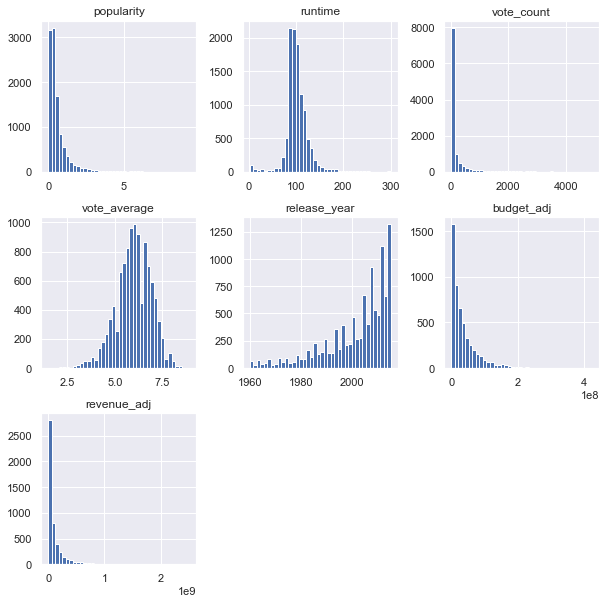

In [316]:
sns.set()
df_rev.hist(figsize=(10,10), bins=40);

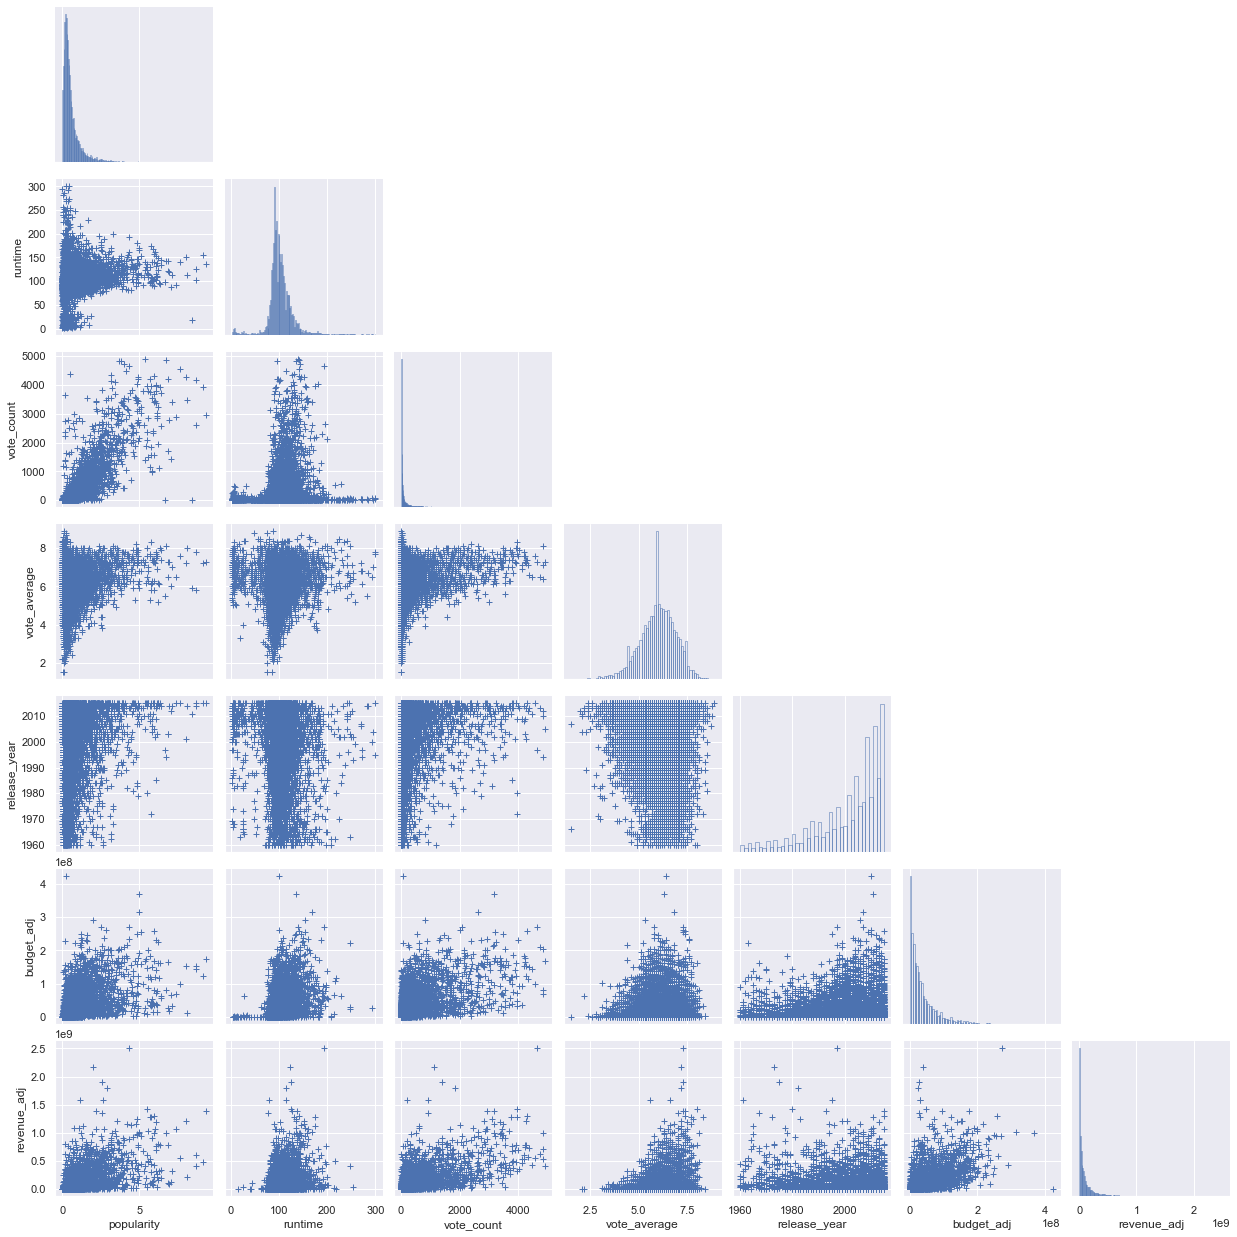

In [317]:
sns.set()
sns.pairplot(df_rev, corner=True, plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),);

Correlation matrix to visualize and even quantify correlation between variables<br>
Source: https://towardsdatascience.com/data-exploration-and-analysis-using-python-e564473d7607

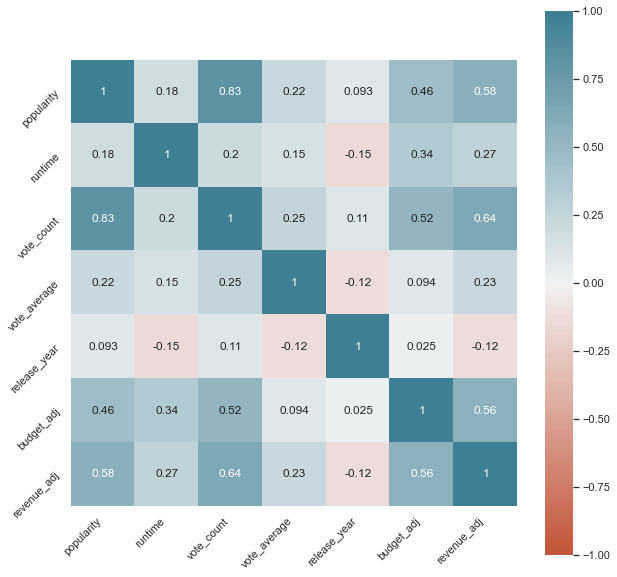

In [318]:
df_rev.corr()
plt.figure(figsize=(10,10))
corr = df_rev.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,

);

Examples for non-correlating data: runtime and vote_count, runtime and revenue_adj, budget_adj and vote_average

Examples for correlating data: budget_adj and revenue_adj, vote_count and popularity, revenue_adj and vote_count

Little correlations:
revenue and vote_average, vote_average and vote count, vote_average and popularity

### Research Question 1 
#### What kinds of properties are associated with movies that have high revenues?

Actually the question can already be answered with the help of above pairplot and correlation diagram. There is a correlation visible with: "vote_count", "popularity" and "budget_adj" and also a slight correlation with "vote_average".

But here also a short univariate analysis:

In [319]:
df.revenue_adj.describe()

count    4.850000e+03
mean     1.150774e+08
std      1.988419e+08
min      2.370705e+00
25%      1.046262e+07
50%      4.392749e+07
75%      1.315644e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [320]:
df.revenue_adj.isna().sum()

6016

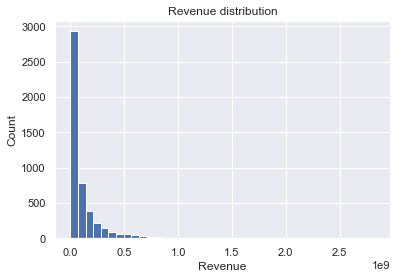

In [321]:
df['revenue_adj'].hist(bins=40);
plt.title("Revenue distribution");
plt.xlabel("Revenue");
plt.ylabel("Count");

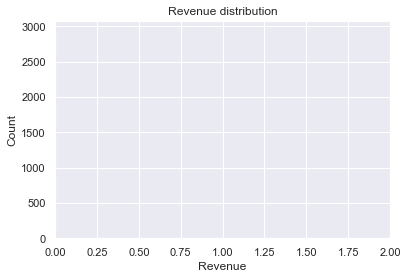

In [322]:
#why the heck is plot not showing up here only because of xlim? I don't get it.
df['revenue_adj'].hist(bins=40);
plt.xlim([0,2])
plt.title("Revenue distribution");
plt.xlabel("Revenue");
plt.ylabel("Count");

### Research Question 2 
#### Who are the most sucessful actors? (i.e. actor who took part in the most movies)
For the purpose of this investigation I defined "success" as who's name occurs the most in column cast. One could argue that success should rather be the overall achieved revenue, or maybe there is even another way to define it.  
Herefore I will again create a separate copy in order to not impact the original dataframe

In [323]:
df2=df.copy()
df2[df2.cast.isnull()]

id    imdb_id  popularity  budget  revenue  \
371    345637.0  tt4661600    0.422901     NaN      NaN   
441    355020.0  tt4908644    0.220751     NaN      NaN   
465    321109.0  tt4393514    0.201696     NaN      NaN   
536    333350.0  tt3762974    0.122543     NaN      NaN   
538    224972.0  tt3983674    0.114264     NaN      NaN   
...         ...        ...         ...     ...      ...   
9677    13926.0  tt0093832    0.253376     NaN      NaN   
9755    48714.0  tt0061402    0.046272     NaN      NaN   
10434   48784.0  tt0060984    0.146906   200.0      NaN   
10550   13925.0  tt0091455    0.306425     NaN      NaN   
10754    3171.0  tt0064064    0.002757     NaN      NaN   

                                    original_title cast  \
371                            Sanjay's Super Team  NaN   
441    Winter on Fire: Ukraine's Fight for Freedom  NaN   
465                                    Bitter Lake  NaN   
536                                 A Faster Horse  NaN   
538                           The Mask You Live In  NaN   
...                                            ...  ...   
9677                                   Red's Dream  NaN   
9755                                 The Big Shave  NaN   
10434                         Six Men Getting Sick  NaN   
10550                                     Luxo Jr.  NaN   
10754                         Bambi Meets Godzilla  NaN   

                                                homepage  \
371                                                  NaN   
441                http://www.netflix.com/title/80031666   
465                                                  NaN   
536                                                  NaN   
538                          http://themaskyoulivein.org   
...                                                  ...   
9677                                                 NaN   
9755                                                 NaN   
10434                                                NaN   
10550  http://www.pixar.com/short_films/Theatrical-Sh...   
10754                                                NaN   

                     director  \
371              Sanjay Patel   
441         Evgeny Afineevsky   
465               Adam Curtis   
536                David Gelb   
538    Jennifer Siebel Newsom   
...                       ...   
9677            John Lasseter   
9755          Martin Scorsese   
10434             David Lynch   
10550           John Lasseter   
10754            Marv Newland   

                                                 tagline  ...  \
371                                                  NaN  ...   
441                    The Next Generation Of Revolution  ...   
465                                                  NaN  ...   
536                                                  NaN  ...   
538    Is american masculinity harming our boys, men ...  ...   
...                                                  ...  ...   
9677                                                 NaN  ...   
9755                                                 NaN  ...   
10434                                                NaN  ...   
10550                                                NaN  ...   
10754                                                NaN  ...   

                                                overview runtime  \
371    Sanjay's Super Team follows the daydream of a ...     7.0   
441    A documentary on the unrest in Ukraine during ...    98.0   
465    An experimental documentary that explores Saud...   135.0   
536    David Gelb (Jiro Dreams of Sushi) tackles anot...    90.0   
538    Compared to girls, research shows that boys in...    88.0   
...                                                  ...     ...   
9677   Life as the sole sale item in the clearance co...     4.0   
9755   This short film is a metaphor for the Vietnam ...     6.0   
10434  Lynch's first film project consists of a loop ...     4.0   
10550  A baby la

In [324]:
type(df2['cast'][371])

float

'Cast' contains some NaN values wich are interpreted as 'float'. This causes problems in the following cell which is why they need to be dropped

In [325]:
df2.dropna(subset=['cast'], inplace=True)

Plotting 20 most successfull actors. 

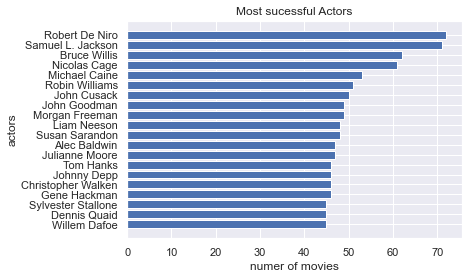

In [326]:
#Split operation on 'cast' and count the most common entries in list with Counter.most_common
from collections import Counter
cast = df2['cast']
cast_counter = Counter()

for i in cast:
    cast_counter.update(i.split('|'))

actors = []
popularity_actors = []

for actor in cast_counter.most_common(20):
    actors.append(actor[0])
    popularity_actors.append(actor[1])
    
actors.reverse()
popularity_actors.reverse()

plt.barh(actors, popularity_actors);
plt.title("Most sucessful Actors");
plt.ylabel("actors");
plt.xlabel("numer of movies");

#### Alternative implementation (vectorized operations) as proposed by corrector:

In [327]:
actors_df = (df2.assign(cast=df['cast']
                             .str.split('|'))
                             .explode('cast'))
actors_df

id    imdb_id  popularity       budget       revenue  \
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
...         ...        ...         ...          ...           ...   
10865   22293.0  tt0060666    0.035919      19000.0           NaN   
10865   22293.0  tt0060666    0.035919      19000.0           NaN   
10865   22293.0  tt0060666    0.035919      19000.0           NaN   
10865   22293.0  tt0060666    0.035919      19000.0           NaN   
10865   22293.0  tt0060666    0.035919      19000.0           NaN   

                 original_title                 cast  \
0                Jurassic World          Chris Pratt   
0                Jurassic World  Bryce Dallas Howard   
0                Jurassic World          Irrfan Khan   
0                Jurassic World    Vincent D'Onofrio   
0                Jurassic World        Nick Robinson   
...                         ...                  ...   
10865  Manos: The Hands of Fate     Harold P. Warren   
10865  Manos: The Hands of Fate           Tom Neyman   
10865  Manos: The Hands of Fate        John Reynolds   
10865  Manos: The Hands of Fate         Diane Mahree   
10865  Manos: The Hands of Fate    Stephanie Nielson   

                            homepage          director  \
0      http://www.jurassicworld.com/   Colin Trevorrow   
0      http://www.jurassicworld.com/   Colin Trevorrow   
0      http://www.jurassicworld.com/   Colin Trevorrow   
0      http://www.jurassicworld.com/   Colin Trevorrow   
0      http://www.jurassicworld.com/   Colin Trevorrow   
...                              ...               ...   
10865                            NaN  Harold P. Warren   
10865                            NaN  Harold P. Warren   
10865                            NaN  Harold P. Warren   
10865                            NaN  Harold P. Warren   
10865                            NaN  Harold P. Warren   

                                            tagline  ...  \
0                                 The park is open.  ...   
0                                 The park is open.  ...   
0                                 The park is open.  ...   
0                                 The park is open.  ...   
0                                 The park is open.  ...   
...                                             ...  ...   
10865  It's Shocking! It's Beyond Your Imagination!  ...   
10865  It's Shocking! It's Beyond Your Imagination!  ...   
10865  It's Shocking! It's Beyond Your Imagination!  ...   
10865  It's Shocking! It's Beyond Your Imagination!  ...   
10865  It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...   124.0   
0      Twenty-two years after the events of Jurassic ...   124.0   
0      Twenty-two years after the events of Jurassic ...   124.0   
0      Twenty-two years after the events of Jurassic ...   124.0   
0      Twenty-two years after the events of Jurassic ...   124.0   
...                                                  ...     ...   
10865  A family gets lost on the road and stumbles up...    74.0   
10865  A family gets lost on the road and stumbles up...    74.0   
10865  A family gets lost on the road and stumbles up...    74.0   
10865  A family gets lost on the road and stumbles up...    74.0   
10865  A family gets lost on the road and stumbles up...    74.0   

                                          genres  \
0      Action|Adventure|Science Fiction|Thriller   
0      Action|Adventure|Science Fiction|Thriller   
0      Action|Adventure|Science Fiction|Thriller   
0      Action|Adventure|Science Fiction|Thriller   
0      Action|Ad

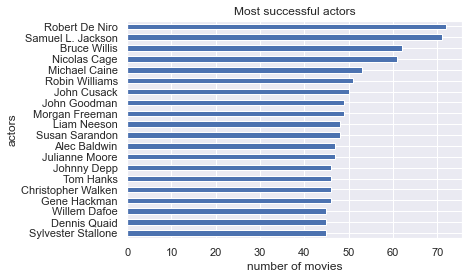

In [328]:
actors_df.groupby('cast').size().sort_values(ascending=True).tail(20).plot.barh();
plt.title("Most successful actors");
plt.ylabel("actors");
plt.xlabel("number of movies");

Univariate exploration of key variable cast:

In [329]:
actors_df.cast.value_counts()

Robert De Niro         72
Samuel L. Jackson      71
Bruce Willis           62
Nicolas Cage           61
Michael Caine          53
                       ..
Marla Adams             1
Golshifteh Farahani     1
Barry James             1
Ariadna Gil             1
Bernie Coulson          1
Name: cast, Length: 19026, dtype: int64

In [330]:
actors_df.cast.describe()

count              52573
unique             19026
top       Robert De Niro
freq                  72
Name: cast, dtype: object

In [331]:
actors_df.cast.value_counts().mean()

2.7632187532849786

### Research Question 3
#### Who are the most successful directors? (i.e. who directed the most movies)
Plotting 20 most successfull actors. 

In [332]:
df2.dropna(subset=['director'], inplace=True)

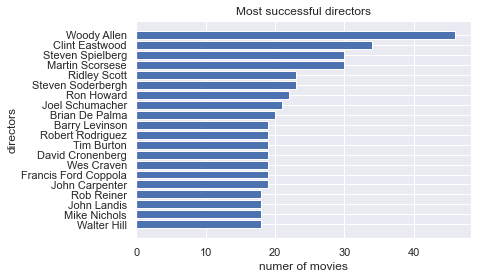

In [333]:
#for the 20 most frequent directors
directors = df2['director']
director_counter = Counter()

for i in directors:
    director_counter.update(i.split('|'))

directors_list = []
popularity_directors = []

for director in director_counter.most_common(20):
    directors_list.append(director[0])
    popularity_directors.append(director[1])
    
directors_list.reverse()
popularity_directors.reverse()

plt.barh(directors_list, popularity_directors);
plt.title("Most successful directors");
plt.ylabel("directors");
plt.xlabel("numer of movies");

#### Alternative implementation (vectorized operations) as proposed by corrector:

In [334]:
directors_df = (df2.assign(director=df['director']
                             .str.split('|'))
                             .explode('director'))
directors_df

id    imdb_id  popularity       budget       revenue  \
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
1       76341.0  tt1392190   28.419936  150000000.0  3.784364e+08   
2      262500.0  tt2908446   13.112507  110000000.0  2.952382e+08   
3      140607.0  tt2488496   11.173104  200000000.0  2.068178e+09   
4      168259.0  tt2820852    9.335014  190000000.0  1.506249e+09   
...         ...        ...         ...          ...           ...   
10861      21.0  tt0060371    0.080598          NaN           NaN   
10862   20379.0  tt0060472    0.065543          NaN           NaN   
10863   39768.0  tt0060161    0.065141          NaN           NaN   
10864   21449.0  tt0061177    0.064317          NaN           NaN   
10865   22293.0  tt0060666    0.035919      19000.0           NaN   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
0                          http://www.jurassicworld.com/     Colin Trevorrow   
1                            http://www.madmaxmovie.com/       George Miller   
2         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
4                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10861                                                NaN         Bruce Brown   
10862                                                NaN  John Frankenheimer   
10863                                                NaN      Eldar Ryazanov   
10864                                                NaN         Woody Allen   
10865                                                NaN    Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10861                                                NaN  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...   124.0   
1      An apocalyptic story set in the furthest reach...   120.0   
2      Beatrice Prior must confront her inner de

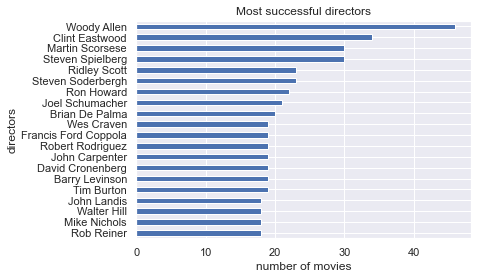

In [335]:
directors_df.groupby('director').size().sort_values(ascending=True).tail(20).plot.barh();
plt.title("Most successful directors");
plt.ylabel("directors");
plt.xlabel("number of movies");

Univariate exploration of key variable directors:

In [336]:
directors_df.director.value_counts()

Woody Allen         46
Clint Eastwood      34
Steven Spielberg    30
Martin Scorsese     30
Ridley Scott        23
                    ..
Jay Sandrich         1
Pablo Trapero        1
Paul Tarnopol        1
Rob Meltzer          1
Dearbhla Walsh       1
Name: director, Length: 5310, dtype: int64

In [337]:
directors_df.director.describe()

count           11801
unique           5310
top       Woody Allen
freq               46
Name: director, dtype: object

In [338]:
directors_df.director.value_counts().mean()

2.2224105461393595

### Research Question 4
#### a) Which are the most successful production companies? (i.e. who released the most movies)
Plotting 20 most successfull production companies. 

In [339]:
df2.dropna(subset=['production_companies'], inplace=True)

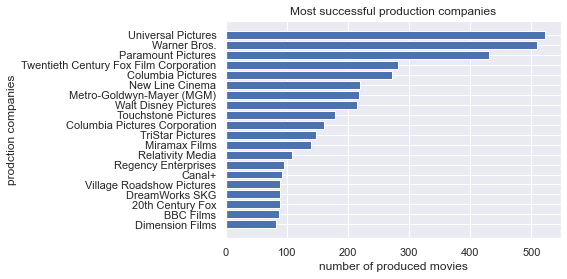

In [340]:
#for the 20 most frequent production companies
production_companies = df2['production_companies']
pc_counter = Counter()

for i in production_companies:
    pc_counter.update(i.split('|'))

pc_list = []
popularity_pc = []

for pc in pc_counter.most_common(20):
    pc_list.append(pc[0])
    popularity_pc.append(pc[1])
    
pc_list.reverse()
popularity_pc.reverse()

#print(directors_list)
#print(popularity_list)

plt.barh(pc_list, popularity_pc);
plt.title("Most successful production companies");
plt.ylabel("prodction companies");
plt.xlabel("number of produced movies");

#### Alternative implementation (vectorized operations) as proposed by corrector:

In [341]:
# split production_companies string, at |, explode the list to rows
production_companies_df = (df2.assign(production_companies=df['production_companies']
                             .str.split('|'))
                             .explode('production_companies'))
production_companies_df

id    imdb_id  popularity       budget       revenue  \
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
...         ...        ...         ...          ...           ...   
10862   20379.0  tt0060472    0.065543          NaN           NaN   
10862   20379.0  tt0060472    0.065543          NaN           NaN   
10863   39768.0  tt0060161    0.065141          NaN           NaN   
10864   21449.0  tt0061177    0.064317          NaN           NaN   
10865   22293.0  tt0060666    0.035919      19000.0           NaN   

                 original_title  \
0                Jurassic World   
0                Jurassic World   
0                Jurassic World   
0                Jurassic World   
0                Jurassic World   
...                         ...   
10862                Grand Prix   
10862                Grand Prix   
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
...                                                  ...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                            homepage            director  \
0      http://www.jurassicworld.com/     Colin Trevorrow   
0      http://www.jurassicworld.com/     Colin Trevorrow   
0      http://www.jurassicworld.com/     Colin Trevorrow   
0      http://www.jurassicworld.com/     Colin Trevorrow   
0      http://www.jurassicworld.com/     Colin Trevorrow   
...                              ...                 ...   
10862                            NaN  John Frankenheimer   
10862                            NaN  John Frankenheimer   
10863                            NaN      Eldar Ryazanov   
10864                            NaN         Woody Allen   
10865                            NaN    Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
0                                      The park is open.  ...   
0                                      The park is open.  ...   
0                                      The park is open.  ...   
0                                      The park is open.  ...   
...                                                  ...  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...   124.0   
0      Twenty-two years after the events of Jurassic ...   124.0   
0      Twenty-two years after the events of Jurassic ...   124.0   
0      Twenty-two years after the events of Jurassic ...   124.0   
0      Twenty-two years after the events of Jurassic ...   124.0   
...                                                  ...     ...   
10862  Grand Prix driver Pete Aron is fired by his te...   176.0

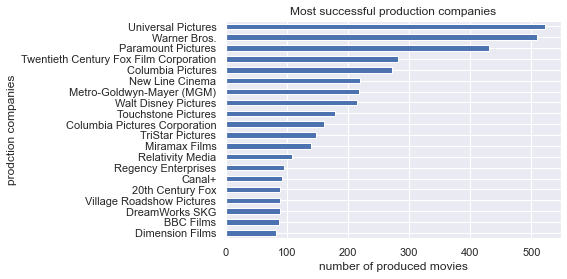

In [342]:
production_companies_df.groupby('production_companies').size().sort_values(ascending=True).tail(20).plot.barh();
plt.title("Most successful production companies");
plt.ylabel("prodction companies");
plt.xlabel("number of produced movies");

#### b) Which are the most successful production companies? (i.e. who made the highest revenue)
For production companies it is also interesting to look at the overall revenue. For actors or directos it would not make sense because we cannot judge what an actor or director earned based on a movies revenue. 

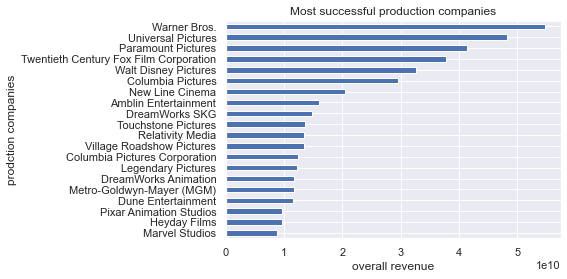

In [343]:
# group exploded dataframe by production_companies, get total revenue
production_companies_df.groupby('production_companies')['revenue'].sum().sort_values(ascending=True).tail(20).plot.barh();
plt.title("Most successful production companies");
plt.ylabel("prodction companies");
plt.xlabel("overall revenue");

Univariate exploration of key variable production_companies:

In [344]:
production_companies_df.production_companies.value_counts()

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
                                         ... 
Gentle Machine Productions LLC              1
Weintraub International Group               1
Media Financial Incorporated                1
Universal Productions France S.A.           1
Infra-Red Pictures                          1
Name: production_companies, Length: 7845, dtype: int64

In [345]:
production_companies_df.production_companies.describe()

count                  23152
unique                  7845
top       Universal Pictures
freq                     522
Name: production_companies, dtype: object

In [346]:
production_companies_df.production_companies.isna().sum()

0

In [347]:
production_companies_df.production_companies.value_counts().mean()

2.951179094964946

### Research Question 5
#### Which genres are most popular from year to year?
#### a) One way to answer the question could be to just count which kind of genres occur the most:

In [348]:
df2.dropna(subset=['genres'], inplace=True)

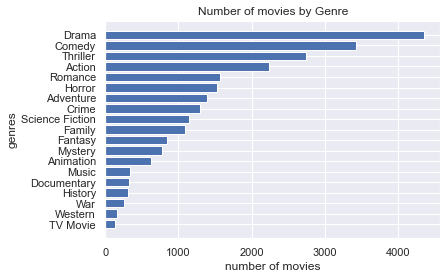

In [349]:
genres_list = df2['genres']
genres_counter = Counter()

for i in genres_list:
    genres_counter.update(i.split('|'))

genres = []
popularity = []

for genre in genres_counter.most_common():
    genres.append(genre[0])
    popularity.append(genre[1])

genres.reverse()
popularity.reverse()
    
del genres[0]
del popularity[0]

plt.barh(genres, popularity);
plt.title("Number of movies by Genre");
plt.ylabel("genres");
plt.xlabel("number of movies");

#### Alternative implementation (vectorized operations) as proposed by corrector:

In [350]:
genres_df = (df2.assign(genres=df['genres']
                             .str.split('|'))
                             .explode('genres'))
genres_df

id    imdb_id  popularity       budget       revenue  \
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
0      135397.0  tt0369610   32.985763  150000000.0  1.513529e+09   
1       76341.0  tt1392190   28.419936  150000000.0  3.784364e+08   
...         ...        ...         ...          ...           ...   
10863   39768.0  tt0060161    0.065141          NaN           NaN   
10863   39768.0  tt0060161    0.065141          NaN           NaN   
10864   21449.0  tt0061177    0.064317          NaN           NaN   
10864   21449.0  tt0061177    0.064317          NaN           NaN   
10865   22293.0  tt0060666    0.035919      19000.0           NaN   

                 original_title  \
0                Jurassic World   
0                Jurassic World   
0                Jurassic World   
0                Jurassic World   
1            Mad Max: Fury Road   
...                         ...   
10863       Beregis Avtomobilya   
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
...                                                  ...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                            homepage          director  \
0      http://www.jurassicworld.com/   Colin Trevorrow   
0      http://www.jurassicworld.com/   Colin Trevorrow   
0      http://www.jurassicworld.com/   Colin Trevorrow   
0      http://www.jurassicworld.com/   Colin Trevorrow   
1        http://www.madmaxmovie.com/     George Miller   
...                              ...               ...   
10863                            NaN    Eldar Ryazanov   
10863                            NaN    Eldar Ryazanov   
10864                            NaN       Woody Allen   
10864                            NaN       Woody Allen   
10865                            NaN  Harold P. Warren   

                                            tagline  ...  \
0                                 The park is open.  ...   
0                                 The park is open.  ...   
0                                 The park is open.  ...   
0                                 The park is open.  ...   
1                                What a Lovely Day.  ...   
...                                             ...  ...   
10863                                           NaN  ...   
10863                                           NaN  ...   
10864                     WOODY ALLEN STRIKES BACK!  ...   
10864                     WOODY ALLEN STRIKES BACK!  ...   
10865  It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...   124.0   
0      Twenty-two years after the events of Jurassic ...   124.0   
0      Twenty-two years after the events of Jurassic ...   124.0   
0      Twenty-two years after the events of Jurassic ...   124.0   
1      An apocalyptic story set in the furthest reach...   120.0   
...                                                  ...     ...   
10863  An insurance agent who moonlights as a carthie...    94.0   
10863  An insurance agent who moonlights as a carthie...    94.0   
10864  In co

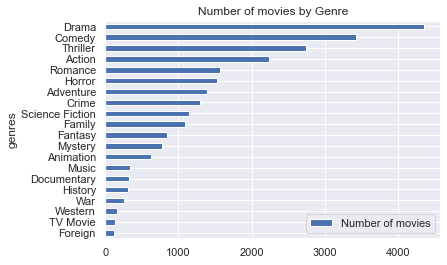

In [351]:
genres_df.groupby('genres').size().sort_values(ascending=True).tail(20).to_frame('Number of movies').plot.barh();
plt.title("Number of movies by Genre");

Only the problem here is that actually I like to have more than just the number of occurances, namely the evolution over the years. And maybe I want to compare the genres to other data aswell. 

#### b) I will try to answer the question more accurately by showing the development of the genres over the years
My idea is to use Multilabel Bineriser in order to be able to compare a certain genre to other properties

In [352]:
df3 = tmdbmovies_df.copy()
df3.drop(['id', 'imdb_id', 'budget', 'revenue', 'original_title', 'director', 'homepage', 'tagline', 'keywords', 'overview', 'cast', 'production_companies', 'release_date'], axis=1, inplace=True)
df3

popularity runtime                                     genres  \
0               32.985763     124  Action|Adventure|Science Fiction|Thriller   
1               28.419936     120  Action|Adventure|Science Fiction|Thriller   
2               13.112507     119         Adventure|Science Fiction|Thriller   
3               11.173104     136   Action|Adventure|Science Fiction|Fantasy   
4                9.335014     137                      Action|Crime|Thriller   
...                   ...     ...                                        ...   
10861            0.080598      95                                Documentary   
10862  0.0655429999999999     176                     Action|Adventure|Drama   
10863  0.0651409999999999      94                             Mystery|Comedy   
10864            0.064317      80                              Action|Comedy   
10865            0.035919      74                                     Horror   

       vote_count  vote_average  release_year   budget_adj   revenue_adj  
0            5562           6.5          2015  137999939.0  1.392446e+09  
1            6185           7.1          2015  137999939.0  3.481613e+08  
2            2480           6.3          2015  101199955.0  2.716190e+08  
3            5292           7.5          2015  183999919.0  1.902723e+09  
4            2947           7.3          2015  174799923.0  1.385749e+09  
...           ...           ...           ...          ...           ...  
10861          11           7.4          1966          NaN           NaN  
10862          20           5.7          1966          NaN           NaN  
10863          11           6.5          1966          NaN           NaN  
10864          22           5.4          1966          NaN           NaN  
10865          15           1.5          1966     127642.0           NaN  

[10866 rows x 8 columns]

In [353]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  object 
 1   runtime       10866 non-null  object 
 2   genres        10866 non-null  object 
 3   vote_count    10866 non-null  int64  
 4   vote_average  10866 non-null  float64
 5   release_year  10866 non-null  int64  
 6   budget_adj    5168 non-null   float64
 7   revenue_adj   4850 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 679.2+ KB


As an input for the MLB I split the genre data with "str.split" and create a series (dataframe as input works aswell)

In [354]:
genres_series = df3.genres.str.split(pat="|")
genres_series.head()

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

In [355]:
type(genres_series)

pandas.core.series.Series

In [356]:
genres_df= pd.DataFrame(genres_series, columns=['genres'])
genres_df.head()

genres
0  [Action, Adventure, Science Fiction, Thriller]
1  [Action, Adventure, Science Fiction, Thriller]
2          [Adventure, Science Fiction, Thriller]
3   [Action, Adventure, Science Fiction, Fantasy]
4                       [Action, Crime, Thriller]

In [357]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_df_mlb = pd.DataFrame(mlb.fit_transform(genres_df['genres']),columns=mlb.classes_)
genres_df_mlb.head()

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0  0       1          1          0       0      0            0      0       0   
1  0       1          1          0       0      0            0      0       0   
2  0       0          1          0       0      0            0      0       0   
3  0       1          1          0       0      0            0      0       0   
4  0       1          0          0       0      1            0      0       0   

   Fantasy  ...  History  Horror  Music  Mystery  Romance  Science Fiction  \
0        0  ...        0       0      0        0        0                1   
1        0  ...        0       0      0        0        0                1   
2        0  ...        0       0      0        0        0                1   
3        1  ...        0       0      0        0        0                1   
4        0  ...        0       0      0        0        0                0   

   TV Movie  Thriller  War  Western  
0         0         1    0        0  
1         0         1    0        0  
2         0         1    0        0  
3         0         0    0        0  
4         0         1    0        0  

[5 rows x 21 columns]

In [358]:
genres_df_mlb.drop(genres_df_mlb.columns[0], axis=1, inplace=True)
genres_df_mlb.head()

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0       1          1          0       0      0            0      0       0   
1       1          1          0       0      0            0      0       0   
2       0          1          0       0      0            0      0       0   
3       1          1          0       0      0            0      0       0   
4       1          0          0       0      1            0      0       0   

   Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0        0        0        0       0      0        0        0   
1        0        0        0       0      0        0        0   
2        0        0        0       0      0        0        0   
3        1        0        0       0      0        0        0   
4        0        0        0       0      0        0        0   

   Science Fiction  TV Movie  Thriller  War  Western  
0                1         0         1    0        0  
1                1         0         1    0        0  
2                1         0         1    0        0  
3                1         0         0    0        0  
4                0         0         1    0        0

Now I join the MLB-dataframe with the main dataframe. And also I drop the 'genre' column since now that I have the MLB-data I do not need it anymore.

In [359]:
df3.drop('genres', axis=1, inplace=True)

In [360]:
frames = [df3, genres_df_mlb]
df_genres_mlb = pd.concat(frames, axis=1)
df_genres_mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   popularity       10866 non-null  object 
 1   runtime          10866 non-null  object 
 2   vote_count       10866 non-null  int64  
 3   vote_average     10866 non-null  float64
 4   release_year     10866 non-null  int64  
 5   budget_adj       5168 non-null   float64
 6   revenue_adj      4850 non-null   float64
 7   Action           10866 non-null  int32  
 8   Adventure        10866 non-null  int32  
 9   Animation        10866 non-null  int32  
 10  Comedy           10866 non-null  int32  
 11  Crime            10866 non-null  int32  
 12  Documentary      10866 non-null  int32  
 13  Drama            10866 non-null  int32  
 14  Family           10866 non-null  int32  
 15  Fantasy          10866 non-null  int32  
 16  Foreign          10866 non-null  int32  
 17  History     

The reason why I took the dataframe "tmdbmovies_df" as input, which is the one I wrangled with python and not with pandas is that after concatenating the two dataframes all numerical values were parsed as floats. Even the binary data in the MLB columns. This annoyed me, and I could not really solve the issue. I only figured out that when I used the dataframe which I had primarily handled in python everything came out just fine. Maybe you know what could be the reason for this?

#### Plotting the total quantity of released movies over the years. Well, the result is kind of what one would expect. The entire industry grew

Text(0.5, 1.0, 'Movies over years')

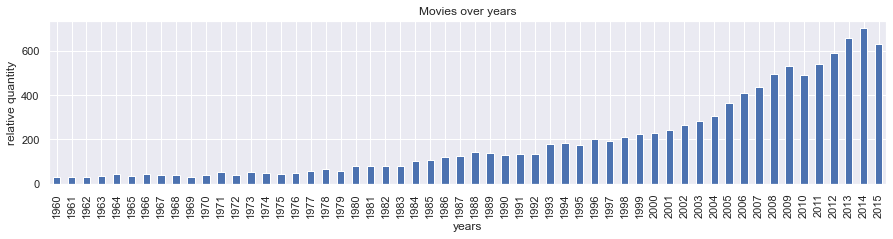

In [361]:
df_genres_mlb['release_year'].value_counts().sort_index(ascending=True).plot(kind='bar', xlabel='years', ylabel='relative quantity', figsize=(15,3));
plt.title("Movies over years")

#### How did the amount of released movies of a specific genre change over time in relation to all released movies? 

I think it is more interesting how a specific genre developed in relation to all movies. Because the whole industry grew over time. So in total numbers we would probably observe a raise in any of the genres. 

In [362]:
# quantities per year at the example of genre 'Drama'
df_genres_mlb['Drama'].groupby(df_genres_mlb['release_year']).sum()

release_year
1960     13
1961     16
1962     21
1963     13
1964     20
1965     20
1966     16
1967     16
1968     20
1969     13
1970     19
1971     30
1972     16
1973     31
1974     21
1975     17
1976     22
1977     24
1978     29
1979     30
1980     32
1981     32
1982     33
1983     35
1984     40
1985     40
1986     51
1987     52
1988     54
1989     54
1990     60
1991     63
1992     65
1993     90
1994     83
1995     93
1996    104
1997     83
1998    108
1999    113
2000    101
2001    100
2002    130
2003    110
2004    141
2005    182
2006    197
2007    197
2008    233
2009    224
2010    211
2011    214
2012    232
2013    253
2014    284
2015    260
Name: Drama, dtype: int32

In [363]:
# total quantity of released movies over the years
df_genres_mlb['release_year'].value_counts().sort_index(ascending=True)

1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: release_year, dtype: int64

In [364]:
genre_titles=df_genres_mlb.columns[7:]
print(genre_titles)

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')


#### Plotting the quantity of released movies for each genre over the years in relation to all released movies

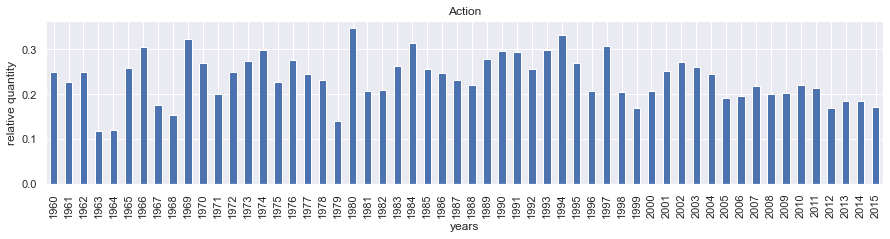

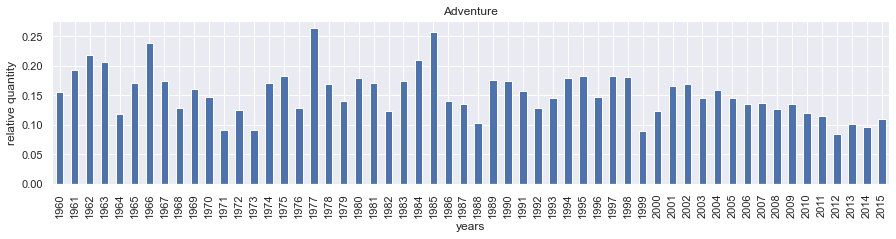

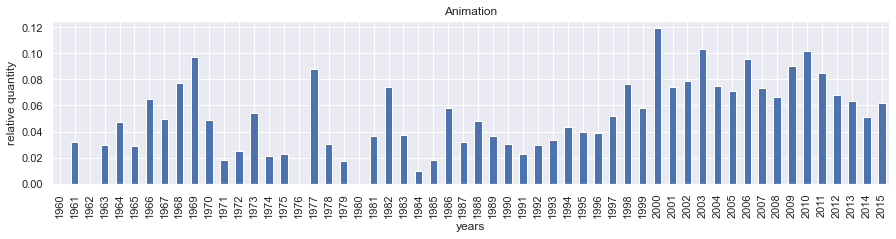

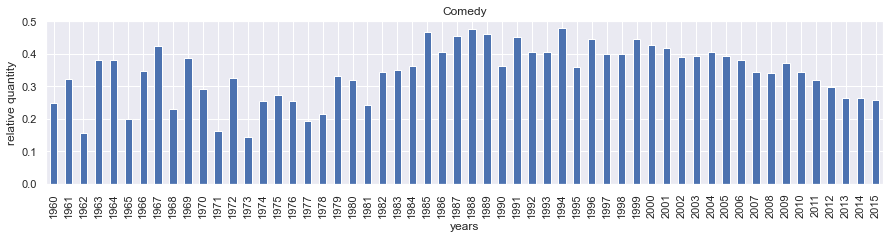

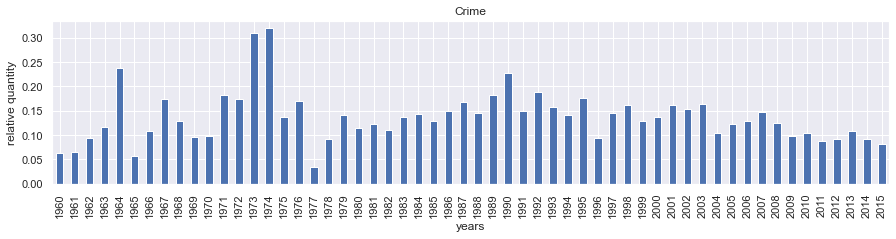

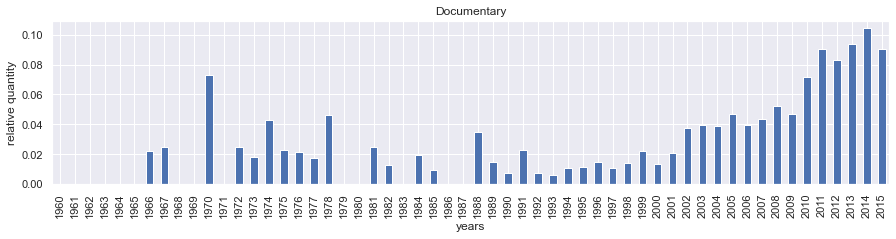

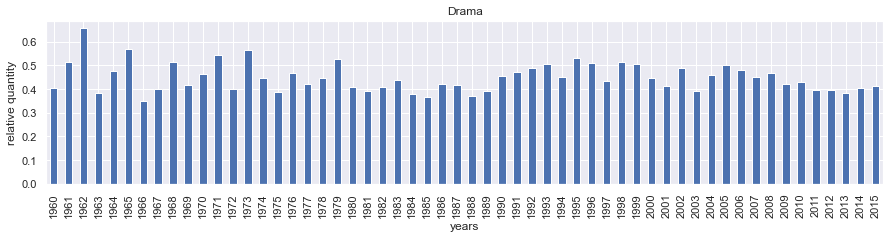

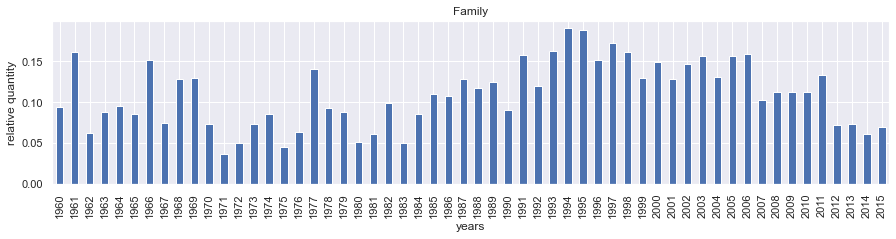

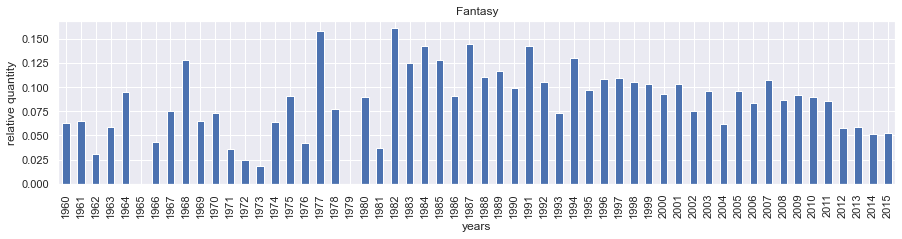

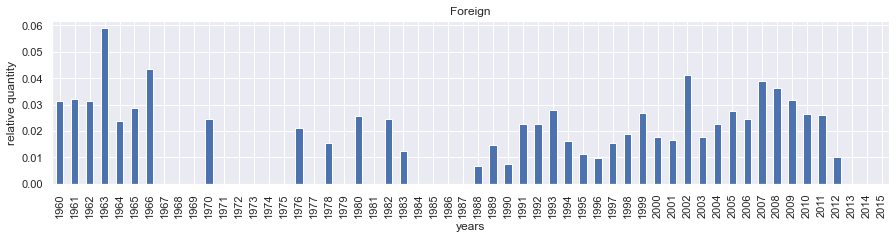

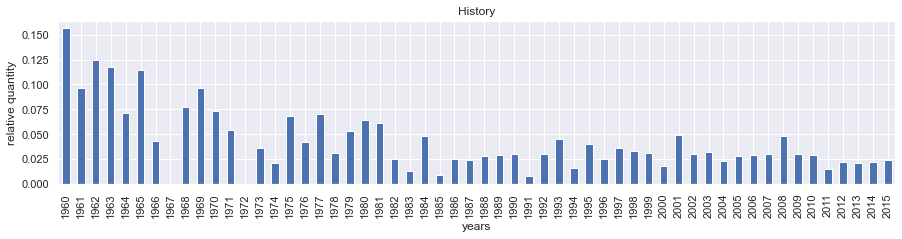

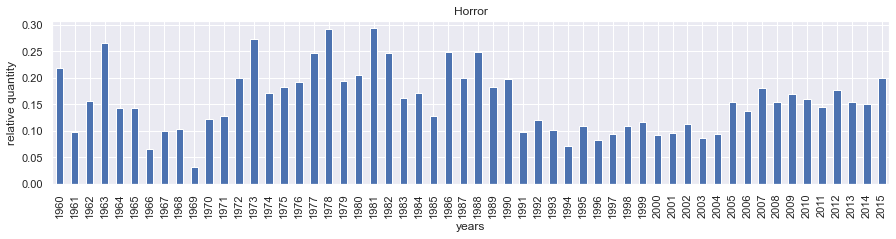

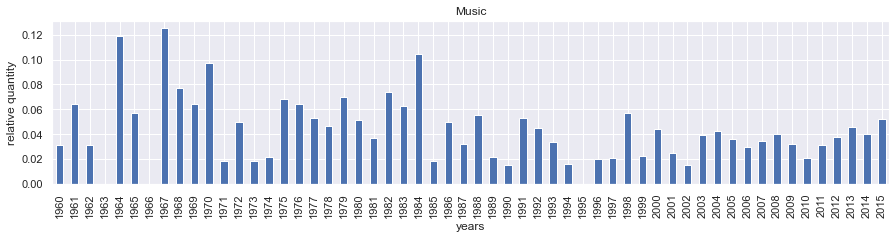

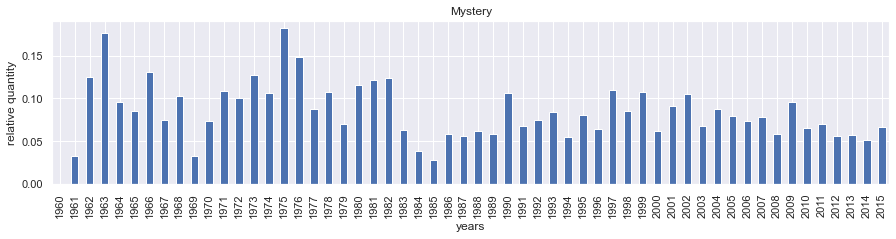

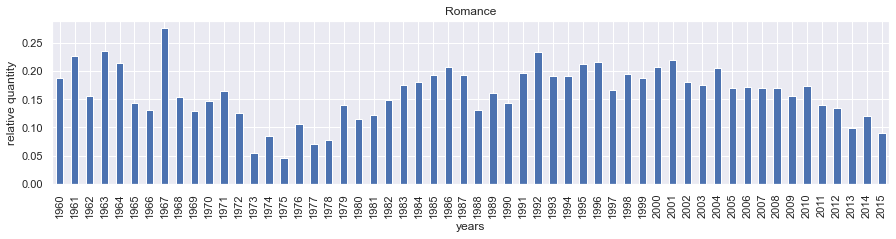

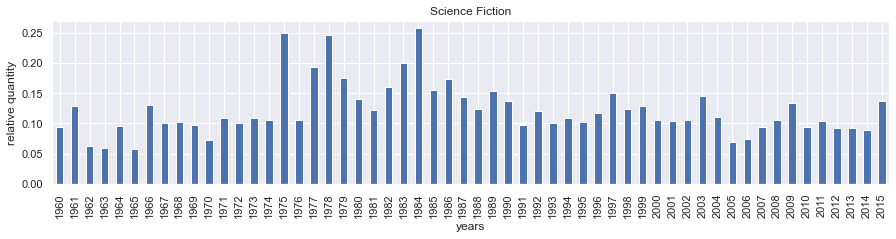

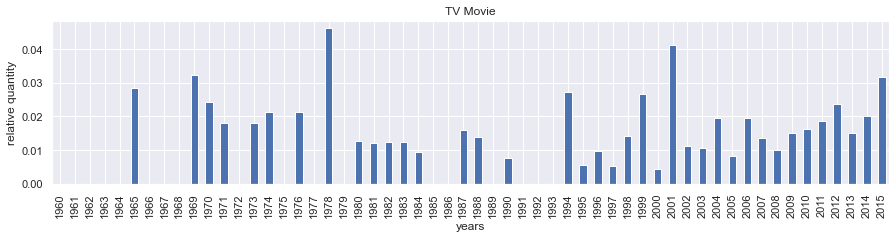

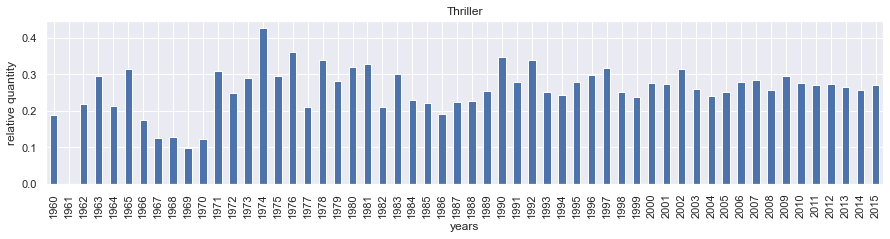

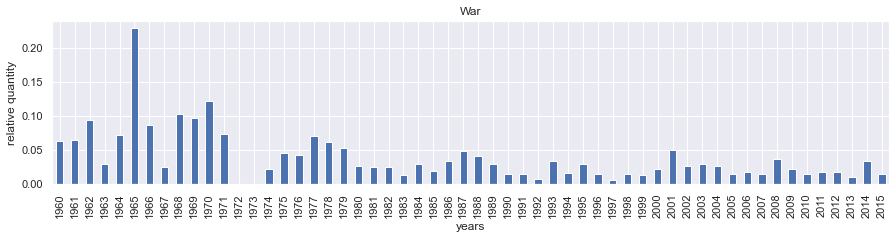

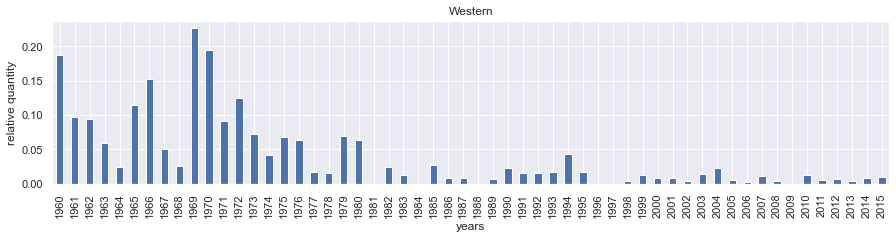

In [365]:
for genre_title in genre_titles:
    genre_var=df_genres_mlb[genre_title].groupby(df_genres_mlb['release_year']).sum() / df_genres_mlb['release_year'].value_counts()
    fig, ax = plt.subplots()
    genre_var.plot(kind='bar', xlabel='years', ylabel='relative quantity', figsize=(15,3))
    plt.title(genre_title)

No clear trend recognizeable. Maybe there is a trend for comedies from mid 80s until 2000 and then a small but steady decline. And thrillers aparently were not very popular in the late 60s.
Documentaries started to become popular only with turn of the millenium.
Especially History, War and Western have become more and more unpopular with time.

Unpopular genres tend to have very high relative extremes. But this is kind of what one can expect when data is scarse. 

#### Alternative implementation (vectorized operations)  as proposed by corrector:

In [366]:
df_genres_mlb.groupby(['release_year'])[genre_titles].sum()

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
release_year                                                                    
1960               8          5          0       8      2            0     13   
1961               7          6          1      10      2            0     16   
1962               8          7          0       5      3            0     21   
1963               4          7          1      13      4            0     13   
1964               5          5          2      16     10            0     20   
1965               9          6          1       7      2            0     20   
1966              14         11          3      16      5            1     16   
1967               7          7          2      17      7            1     16   
1968               6          5          3       9      5            0     20   
1969              10          5          3      12      3            0     13   
1970              11          6          2      12      4            3     19   
1971              11          5          1       9     10            0     30   
1972              10          5          1      13      7            1     16   
1973              15          5          3       8     17            1     31   
1974              14          8          1      12     15            2     21   
1975              10          8          1      12      6            1     17   
1976              13          6          0      12      8            1     22   
1977              14         15          5      11      2            1     24   
1978              15         11          2      14      6            3     29   
1979               8          8          1      19      8            0     30   
1980              27         14          0      25      9            0     32   
1981              17         14          3      20     10            2     32   
1982              17         10          6      28      9            1     33   
1983              21         14          3      28     11            0     35   
1984              33         22          1      38     15            2     40   
1985              28         28          2      51     14            1     40   
1986              30         17          7      49     18            0     51   
1987              29         17          4      57     21            0     52   
1988              32         15          7      69     21            5     54   
1989              38         24          5      63     25            2     54   
1990              39         23          4      48     30            1     60   
1991              39         21          3      60     20            3     63   
1992              34         17          4      54     25            1     65   
1993              53         26          6      72     28            1     90   
1994              61         33          8      88     26            2     83   
1995              47         32          7      63     31            2     93   
1996              42         30          8      91     19            3    104   
1997              59         35         10      77     28            2     83   
1998              43         38         16      84     34            3    108   
1999              38         20         13     100     29            5    113   
2000              47         28         27      97     31            3    101   
2001              61         40         18     101     39            5    100   
2002              72         45         21     104     41           10    130   
2003              73         41         29     111     46           11    110   
2004              75         49         23     125     32           12    141   
2005              70         53         26     143     45           17    182   
2006              80         55         39     155     53           16    197   
2007              95         60         32   

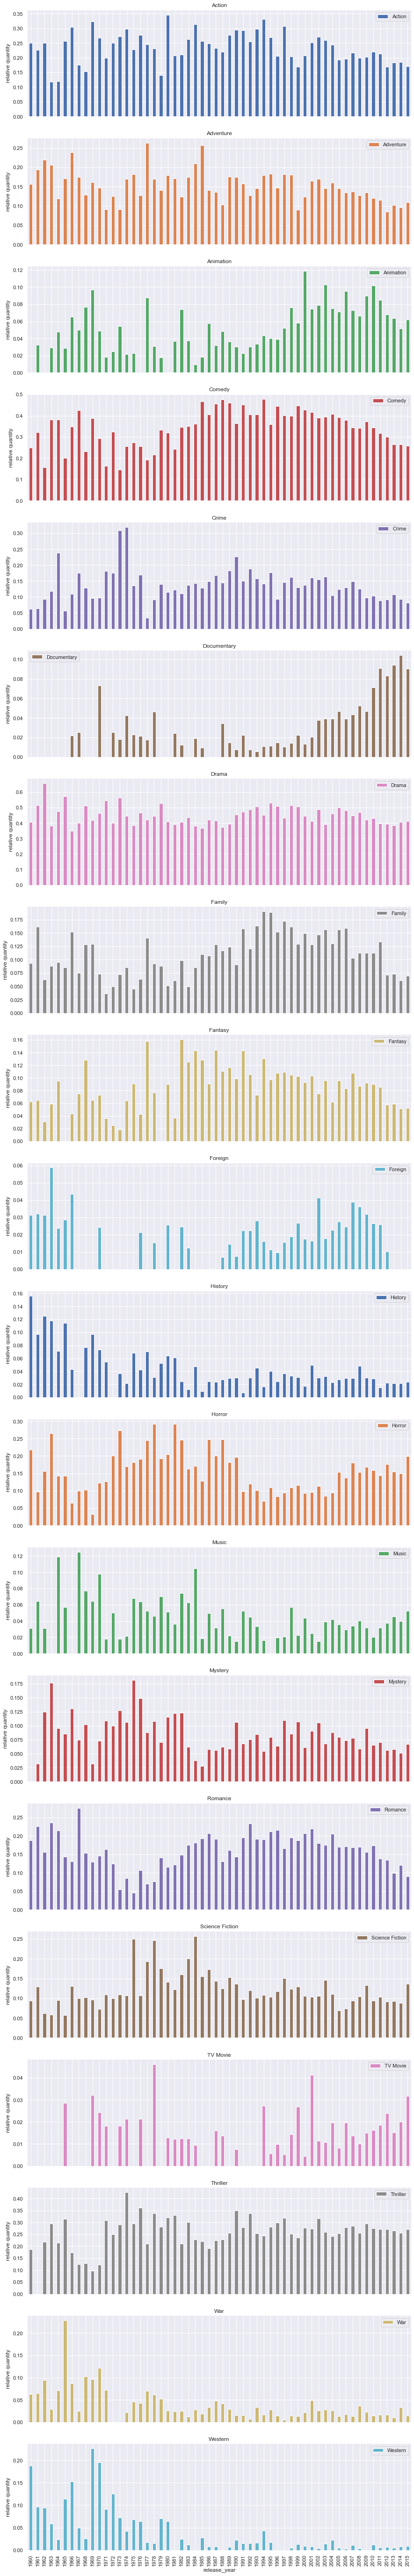

In [367]:
(df_genres_mlb.groupby(['release_year'])[genre_titles]
    .sum()
    .div(df_genres_mlb.groupby(['release_year']).size(), axis=0)
    .plot.bar(subplots=True, ylabel='relative quantity', figsize=[14.7, 100]));

#### c) Another way to answer the question could be to compare which genres have the highest mean popularity:

In [368]:
df_genres_mlb['popularity'] = pd.to_numeric(df_genres_mlb['popularity'])

Univariate exploration of key variable popularity:

In [369]:
df_genres_mlb['popularity'].describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

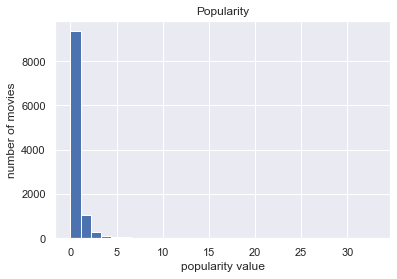

In [370]:
df_genres_mlb['popularity'].hist(bins=30);
plt.xlabel("popularity value");
plt.ylabel("number of movies");
plt.title("Popularity");

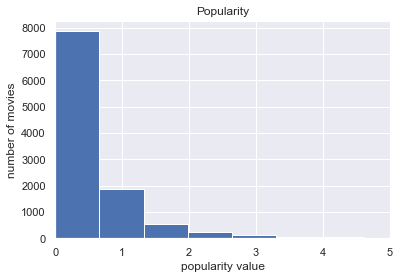

In [371]:
df_genres_mlb['popularity'].hist(bins=50);
#outliers removed
plt.xlim(0,5);
plt.xlabel("popularity value");
plt.ylabel("number of movies");
plt.title("Popularity");

Bivariate exploration of variables popularity and genres

In [372]:
#test if formula works at example of 'Action'
df_genres_mlb.popularity[df_genres_mlb['Action'] == True].mean()

0.9261361362683426

In [373]:
mean_pop_genres=pd.DataFrame(columns=['Mean'])
mean_pop_genres_name=pd.DataFrame(columns=['Genre'])

for genre in genre_titles:
    mean_pop_genres=mean_pop_genres.append({'Mean':df_genres_mlb.popularity[df_genres_mlb[genre] == True].mean()}, ignore_index=True)
    mean_pop_genres_name=mean_pop_genres_name.append({'Genre':genre}, ignore_index=True)
    #print(genre)
#print(mean_pop_genres,mean_pop_genres_name)

mean_pop_genres= mean_pop_genres_name.join(mean_pop_genres)
mean_pop_genres.sort_values(by=['Mean'], inplace=True)
print(mean_pop_genres)

              Genre      Mean
5       Documentary  0.181432
9           Foreign  0.191496
16         TV Movie  0.270896
11           Horror  0.465357
12            Music  0.487321
10          History  0.575936
19          Western  0.590615
6             Drama  0.591496
14          Romance  0.592082
3            Comedy  0.592607
13          Mystery  0.690012
18              War  0.727683
17         Thriller  0.741513
4             Crime  0.744821
7            Family  0.786668
2         Animation  0.852182
0            Action  0.926136
8           Fantasy  0.992840
15  Science Fiction  1.001218
1         Adventure  1.154259


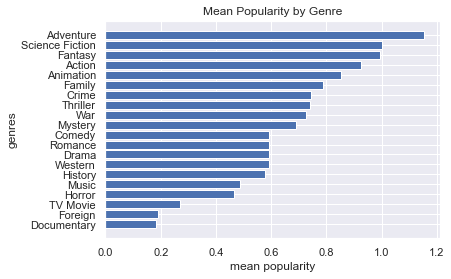

In [374]:
plt.barh(mean_pop_genres['Genre'], mean_pop_genres['Mean']);
plt.title("Mean Popularity by Genre");
plt.ylabel("genres");
plt.xlabel("mean popularity");

The interesting observation here is that the ranking is different now compared to previous analysis by total numbers. For example Adventure is now at the top, whereas Drama wins in total release numbers.

#### Alternative implementation (vectorized operations) as proposed by corrector:

In [375]:
genre_pop = df_genres_mlb[genre_titles].multiply(df_genres_mlb['popularity'], axis="index")
genre_pop.head()

Action  Adventure  Animation  Comedy     Crime  Documentary  Drama  \
0  32.985763  32.985763        0.0     0.0  0.000000          0.0    0.0   
1  28.419936  28.419936        0.0     0.0  0.000000          0.0    0.0   
2   0.000000  13.112507        0.0     0.0  0.000000          0.0    0.0   
3  11.173104  11.173104        0.0     0.0  0.000000          0.0    0.0   
4   9.335014   0.000000        0.0     0.0  9.335014          0.0    0.0   

   Family    Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0     0.0   0.000000      0.0      0.0     0.0    0.0      0.0      0.0   
1     0.0   0.000000      0.0      0.0     0.0    0.0      0.0      0.0   
2     0.0   0.000000      0.0      0.0     0.0    0.0      0.0      0.0   
3     0.0  11.173104      0.0      0.0     0.0    0.0      0.0      0.0   
4     0.0   0.000000      0.0      0.0     0.0    0.0      0.0      0.0   

   Science Fiction  TV Movie   Thriller  War  Western  
0        32.985763       0.0  32.985763  0.0      0.0  
1        28.419936       0.0  28.419936  0.0      0.0  
2        13.112507       0.0  13.112507  0.0      0.0  
3        11.173104       0.0   0.000000  0.0      0.0  
4         0.000000       0.0   9.335014  0.0      0.0

In [376]:
genre_pop.replace({0:np.nan}, inplace = True)
genre_pop

Action  Adventure  Animation    Comedy     Crime  Documentary  \
0      32.985763  32.985763        NaN       NaN       NaN          NaN   
1      28.419936  28.419936        NaN       NaN       NaN          NaN   
2            NaN  13.112507        NaN       NaN       NaN          NaN   
3      11.173104  11.173104        NaN       NaN       NaN          NaN   
4       9.335014        NaN        NaN       NaN  9.335014          NaN   
...          ...        ...        ...       ...       ...          ...   
10861        NaN        NaN        NaN       NaN       NaN     0.080598   
10862   0.065543   0.065543        NaN       NaN       NaN          NaN   
10863        NaN        NaN        NaN  0.065141       NaN          NaN   
10864   0.064317        NaN        NaN  0.064317       NaN          NaN   
10865        NaN        NaN        NaN       NaN       NaN          NaN   

          Drama  Family    Fantasy  Foreign  History    Horror  Music  \
0           NaN     NaN        NaN      NaN      NaN       NaN    NaN   
1           NaN     NaN        NaN      NaN      NaN       NaN    NaN   
2           NaN     NaN        NaN      NaN      NaN       NaN    NaN   
3           NaN     NaN  11.173104      NaN      NaN       NaN    NaN   
4           NaN     NaN        NaN      NaN      NaN       NaN    NaN   
...         ...     ...        ...      ...      ...       ...    ...   
10861       NaN     NaN        NaN      NaN      NaN       NaN    NaN   
10862  0.065543     NaN        NaN      NaN      NaN       NaN    NaN   
10863       NaN     NaN        NaN      NaN      NaN       NaN    NaN   
10864       NaN     NaN        NaN      NaN      NaN       NaN    NaN   
10865       NaN     NaN        NaN      NaN      NaN  0.035919    NaN   

        Mystery  Romance  Science Fiction  TV Movie   Thriller  War  Western  
0           NaN      NaN        32.985763       NaN  32.985763  NaN      NaN  
1           NaN      NaN        28.419936       NaN  28.419936  NaN      NaN  
2           NaN      NaN        13.112507       NaN  13.112507  NaN      NaN  
3           NaN      NaN        11.173104       NaN        NaN  NaN      NaN  
4           NaN      NaN              NaN       NaN   9.335014  NaN      NaN  
...         ...      ...              ...       ...        ...  ...      ...  
10861       NaN      NaN              NaN       NaN        NaN  NaN      NaN  
10862       NaN      NaN              NaN       NaN        NaN  NaN      NaN  
10863  0.065141      NaN              NaN       NaN        NaN  NaN      NaN  
10864       NaN      NaN              NaN       NaN        NaN  NaN      NaN  
10865       NaN      NaN              NaN       NaN        NaN  NaN      NaN  

[10866 rows x 20 columns]

In [377]:
genre_pop.mean(axis=0).sort_values().to_frame('Mean_Pop')

Mean_Pop
Documentary      0.181432
Foreign          0.191496
TV Movie         0.270896
Horror           0.465357
Music            0.487321
History          0.575936
Western          0.590615
Drama            0.591496
Romance          0.592082
Comedy           0.592607
Mystery          0.690012
War              0.727683
Thriller         0.741513
Crime            0.744821
Family           0.786668
Animation        0.852182
Action           0.926136
Fantasy          0.992840
Science Fiction  1.001218
Adventure        1.154259

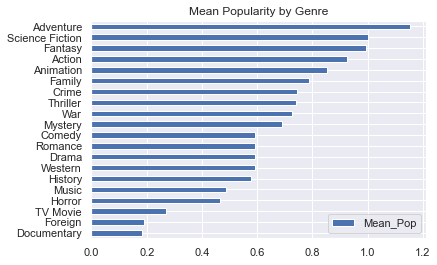

In [378]:
(genre_pop.mean(axis=0).sort_values().to_frame('Mean_Pop')
     .plot.barh());
plt.title("Mean Popularity by Genre");

#### Plotting the mean popularity score of all genres over the years
One would expect the average popularity score to remain more or less constant over time, but this is not the case. The popularity score increases over time. There could be multiple reasons for this. None of it shall be part of this data set investigation but nevertheless it is an interesting observation.

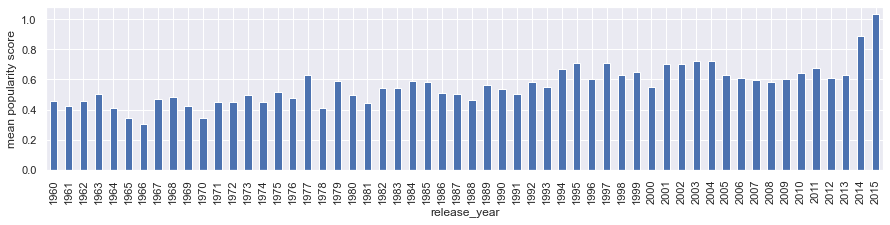

In [379]:
df_genres_mlb['popularity'].groupby(df_genres_mlb['release_year']).mean().plot(kind='bar', figsize=(15,3), ylabel='mean popularity score');

#### Plotting the mean popularity score for each genre over the years. 
This I do by referring to the dataframe with multilabel binerised data. When cell value is 1 True is returned

In [380]:
df_genres_mlb.popularity[df_genres_mlb['Action'] == True].groupby(df_genres_mlb['release_year']).mean()

release_year
1960    0.590724
1961    0.365913
1962    0.708945
1963    0.951729
1964    0.813087
1965    0.451373
1966    0.263347
1967    0.723570
1968    0.365562
1969    0.539976
1970    0.241650
1971    0.600479
1972    0.324774
1973    0.564331
1974    0.419121
1975    0.267063
1976    0.405703
1977    1.419319
1978    0.480816
1979    1.410014
1980    0.594729
1981    0.713769
1982    0.596798
1983    0.851326
1984    0.764616
1985    0.609494
1986    0.656437
1987    0.654580
1988    0.599017
1989    0.786527
1990    0.641086
1991    0.606420
1992    0.581324
1993    0.555953
1994    0.564857
1995    0.793269
1996    0.850782
1997    0.809025
1998    0.759517
1999    0.927192
2000    0.685812
2001    0.750626
2002    0.904187
2003    1.139681
2004    0.926363
2005    0.888248
2006    0.753240
2007    0.760570
2008    0.894801
2009    0.868464
2010    0.932528
2011    1.058096
2012    1.131179
2013    1.009001
2014    1.682013
2015    2.251415
Name: popularity, dtype: float64

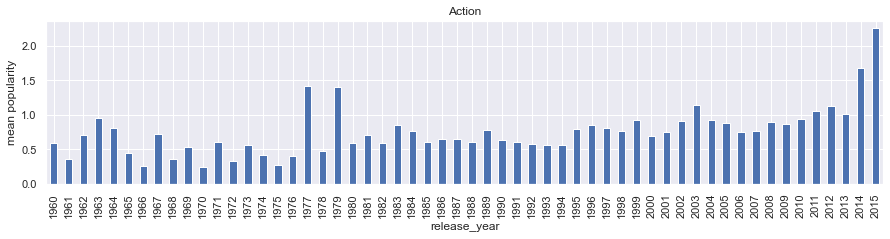

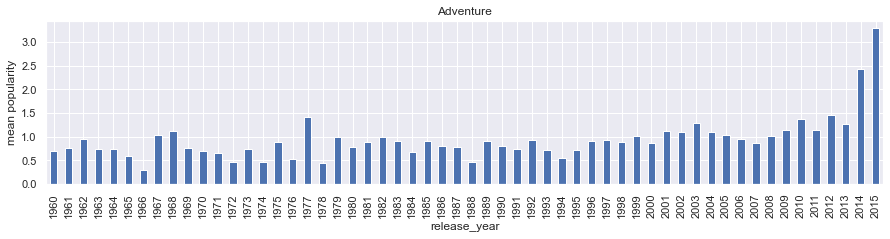

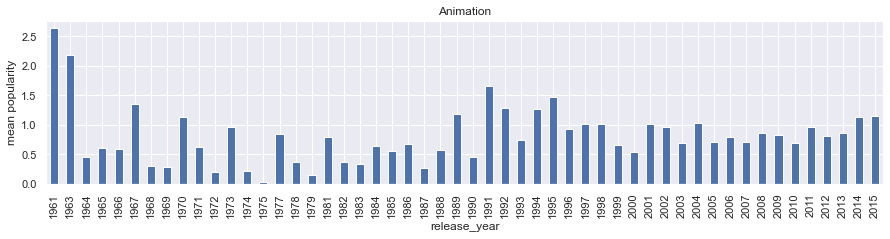

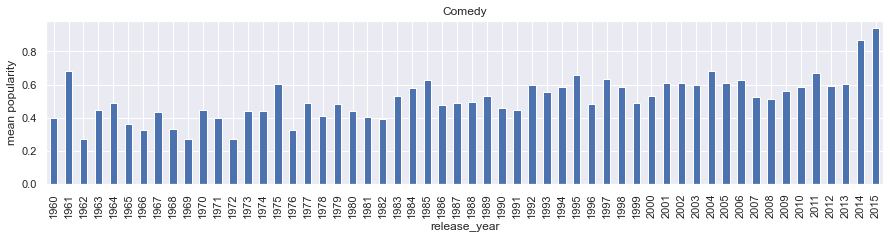

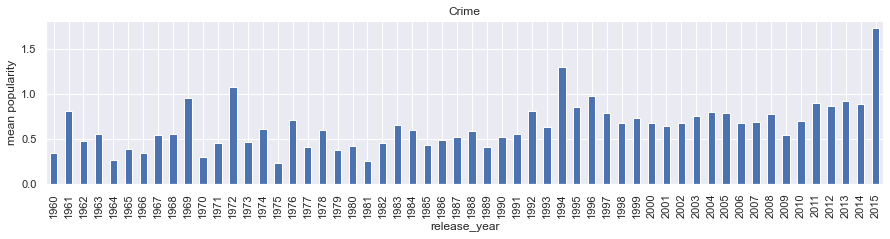

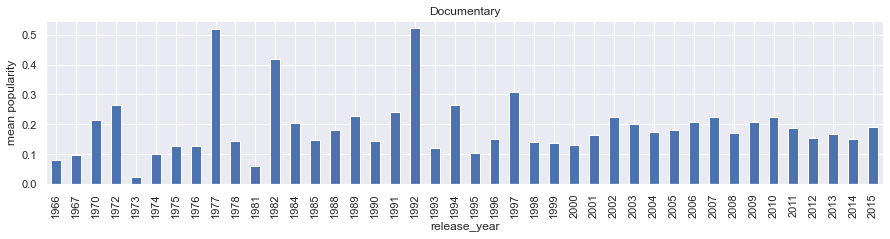

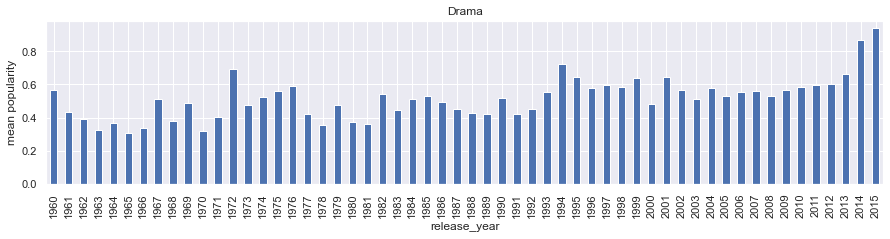

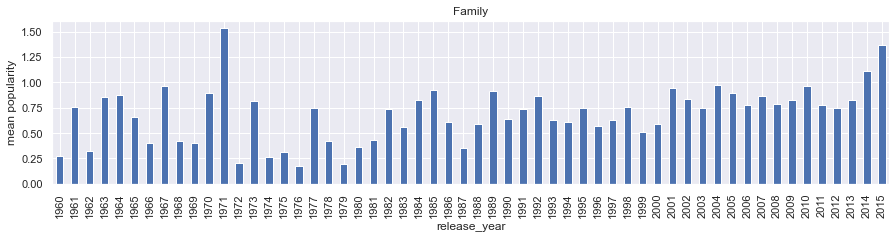

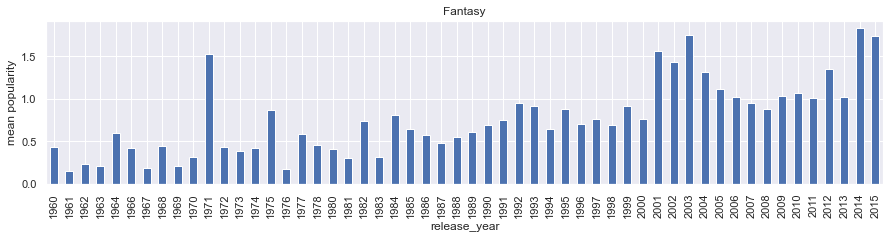

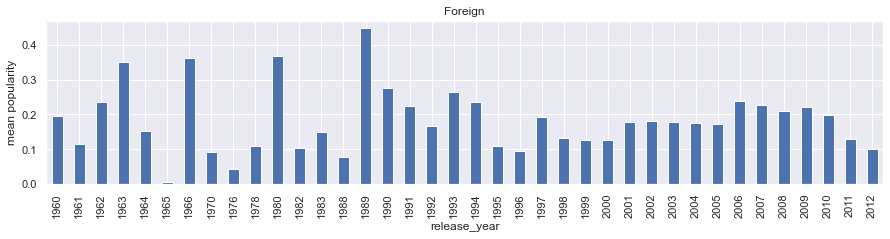

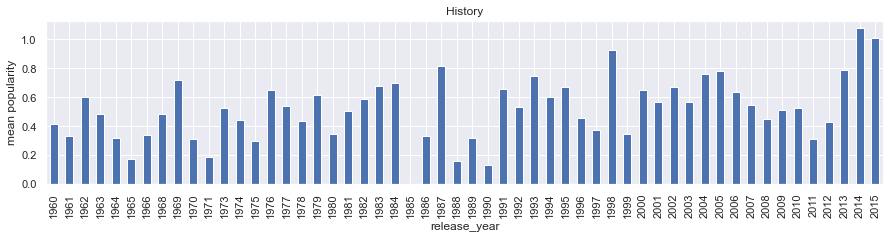

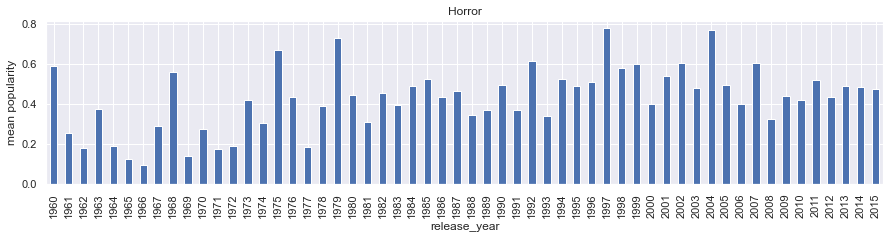

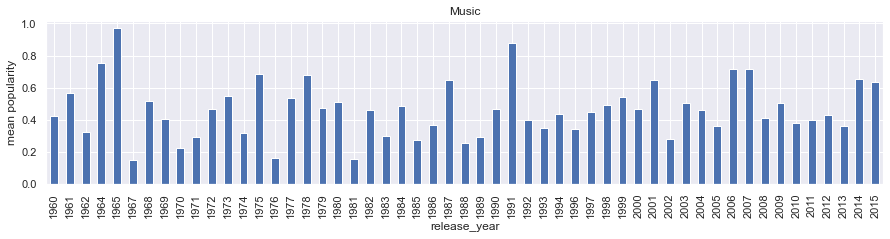

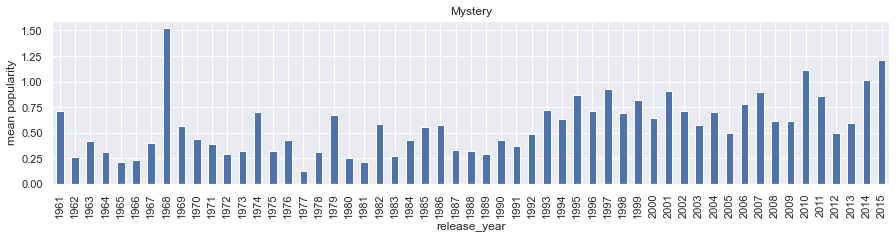

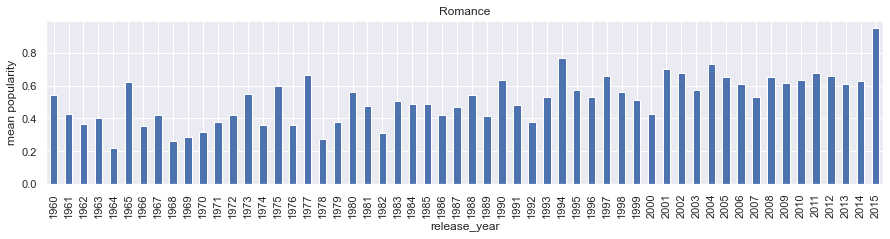

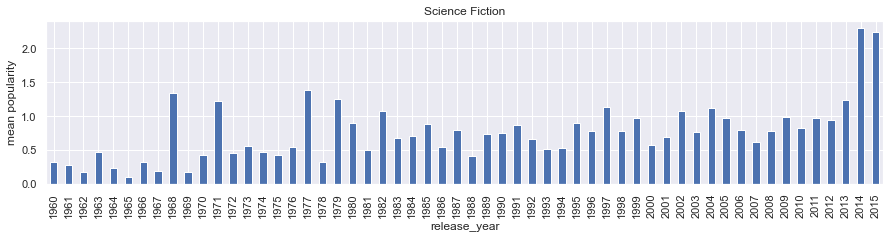

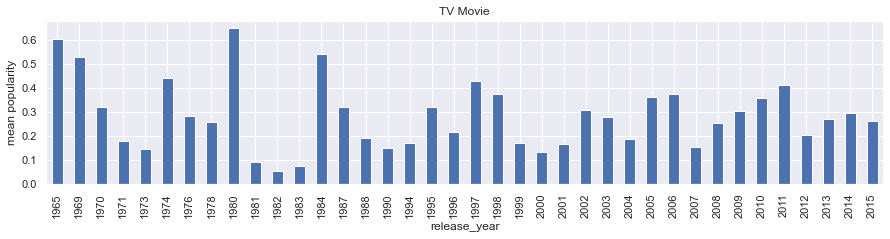

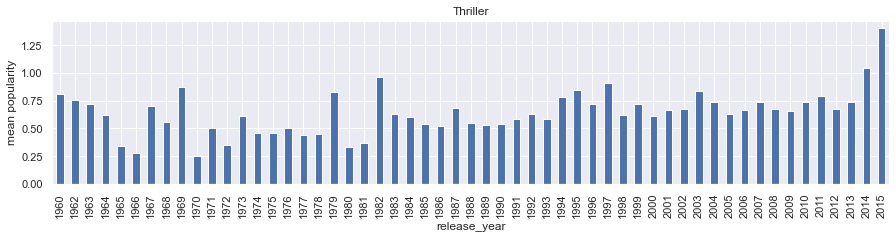

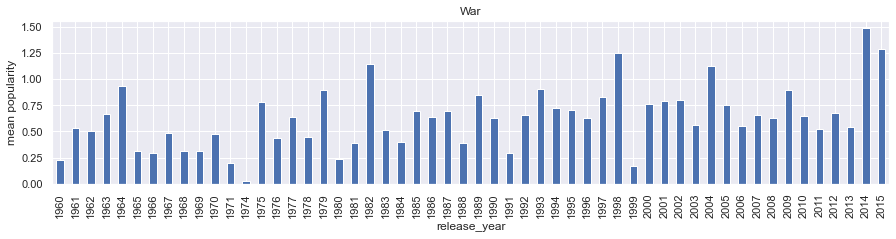

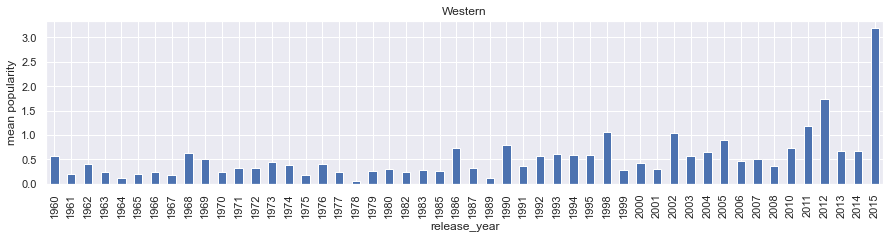

In [381]:
for genre in genre_titles:
    popularity_series=(df_genres_mlb.popularity[df_genres_mlb[genre] == True].groupby(df_genres_mlb['release_year']).mean())
    fig, ax = plt.subplots()
    popularity_series.plot(kind='bar', figsize=(15,3), ylabel='mean popularity');
    plt.title(genre);

<a id='conclusions'></a>
## Conclusions

What I had difficulties with, is that there are few movies (<0,5%) that are extremely overshooting the rest in terms of popularity and money. These outliers are an issue for plotting since movies with low popularity and budget are barely recogniseable but make up about 90% of the data.